In this assignment, we will work on a house price prediction project using the "House Prices:
Advanced Regression Techniques" dataset from Kaggle. The focus is on data cleaning and
preprocessing tasks, including handling missing values, outliers, and categorical features.
we will train a regression model to predict house prices and optimize its performance

Table of Contents

Import libraries
EDA
FE: building the feature importance diagrams
    LGBM
    XGB
    Logistic Regression
    Linear Reagression
Comparison of the all feature importance diagrams
Dada for modeling
Preparing to modeling
Tuning models
   Random Forest
   XGB
   LGBM
Models comparison
Prediction

1. Import libraries

In [31]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits import mplot3d
from scipy import stats
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
import sweetviz as sv

# models
from sklearn.linear_model import LinearRegression,LogisticRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import pearsonr

import xgboost as xgb
import lightgbm as lgb

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

2. Download datasets

In [32]:
train = pd.read_csv('D:\data set\data.csv')
test = pd.read_csv('D:\data set\data.csv')

print("Shape of train: ", train.shape)
print("Shape of test: ", test.shape)


Shape of train:  (4600, 18)
Shape of test:  (4600, 18)


In [33]:
## concat train and test
df = pd.concat((train, test))
temp_df = df
print("Shape of df: ", df.shape)

Shape of df:  (9200, 18)


In [34]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']

In [35]:
df = pd.read_csv('D:\data set\data.csv')
df = train0[features]
df.head(5)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000,3,1.50,1340,1,0,0,3,1340,0,1955,2005,1522,36,62,0
1,2384000,5,2.50,3650,2,0,4,5,3370,280,1921,0,3899,35,58,0
2,342000,3,2.00,1930,1,0,0,4,1930,0,1966,0,2291,18,26,0
3,420000,3,2.25,2000,1,0,0,4,1000,1000,1963,0,4263,3,7,0
4,550000,4,2.50,1940,1,0,0,4,1140,800,1976,1992,4352,31,31,0


In [36]:
df.shape

(4600, 16)

In [37]:
# Determination categorical features
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = train0.columns.values.tolist()
for col in features:
    if train0[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in train0.columns:
        le = LabelEncoder()
        le.fit(list(train0[col].astype(str).values))
        train0[col] = le.transform(list(train0[col].astype(str).values))

In [38]:
train0['price'] = (train0['price']).astype(int)
train0['floors'] = (train0['floors']).astype(int)
train0['bedrooms'] = (train0['bedrooms']).astype(int)

3. EDA

In [39]:
# To show the all columns
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 85)


In [40]:
valid_part = 0.3
pd.set_option('display.max_columns',100)

In [41]:
df = df.dropna()
df.head(5)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000,3,1.50,1340,1,0,0,3,1340,0,1955,2005,1522,36,62,0
1,2384000,5,2.50,3650,2,0,4,5,3370,280,1921,0,3899,35,58,0
2,342000,3,2.00,1930,1,0,0,4,1930,0,1966,0,2291,18,26,0
3,420000,3,2.25,2000,1,0,0,4,1000,1000,1963,0,4263,3,7,0
4,550000,4,2.50,1940,1,0,0,4,1140,800,1976,1992,4352,31,31,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   int32  
 1   bedrooms       4600 non-null   int32  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   floors         4600 non-null   int32  
 5   waterfront     4600 non-null   int64  
 6   view           4600 non-null   int64  
 7   condition      4600 non-null   int64  
 8   sqft_above     4600 non-null   int64  
 9   sqft_basement  4600 non-null   int64  
 10  yr_built       4600 non-null   int64  
 11  yr_renovated   4600 non-null   int64  
 12  street         4600 non-null   int32  
 13  city           4600 non-null   int32  
 14  statezip       4600 non-null   int32  
 15  country        4600 non-null   int32  
dtypes: float64(1), int32(7), int64(8)
memory usage: 449.3 KB


In [43]:
train0.corr()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,1.000000,0.033906,0.005762,0.019263,0.029481,-0.020393,0.031557,0.017586,0.005844,0.007853,0.041038,-0.015050,0.001356,-0.018437,-0.005089,-0.020325,-0.004546,NaN
price,0.033906,1.000000,0.200336,0.327110,0.430410,0.050451,0.137125,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774,0.029366,0.018625,-0.043385,NaN
bedrooms,0.005762,0.200336,1.000000,0.545920,0.594884,0.068819,0.157433,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082,-0.035507,-0.130447,-0.152773,NaN
bathrooms,0.019263,0.327110,0.545920,1.000000,0.761154,0.107837,0.498436,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886,0.007175,-0.097026,-0.194497,NaN
sqft_living,0.029481,0.430410,0.594884,0.761154,1.000000,0.210538,0.340993,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,0.006411,-0.109686,-0.198918,NaN
sqft_lot,-0.020393,0.050451,0.068819,0.107837,0.210538,1.000000,-0.005114,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730,-0.023028,-0.079135,-0.128466,NaN
floors,0.031557,0.137125,0.157433,0.498436,0.340993,-0.005114,1.000000,0.017955,0.021116,-0.306464,0.517319,-0.253308,0.562218,-0.247150,0.037869,0.035746,-0.087240,NaN
waterfront,0.017586,0.135648,-0.003483,0.076232,0.117616,0.017241,0.017955,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625,0.035448,0.001450,0.007938,NaN
view,0.005844,0.228504,0.111028,0.211960,0.311009,0.073907,0.021116,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,0.065077,0.001340,0.079340,NaN
condition,0.007853,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.306464,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818,-0.005480,-0.010592,0.027666,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   int32  
 1   bedrooms       4600 non-null   int32  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   floors         4600 non-null   int32  
 5   waterfront     4600 non-null   int64  
 6   view           4600 non-null   int64  
 7   condition      4600 non-null   int64  
 8   sqft_above     4600 non-null   int64  
 9   sqft_basement  4600 non-null   int64  
 10  yr_built       4600 non-null   int64  
 11  yr_renovated   4600 non-null   int64  
 12  street         4600 non-null   int32  
 13  city           4600 non-null   int32  
 14  statezip       4600 non-null   int32  
 15  country        4600 non-null   int32  
dtypes: float64(1), int32(7), int64(8)
memory usage: 449.3 KB


In [45]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.459130,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,2265.385870,25.674348,38.743696,0.0
std,5.638347e+05,0.908848,0.783781,963.206916,0.552194,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,1307.591795,11.982721,20.919517,0.0
min,0.000000e+00,0.000000,0.000000,370.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.228750e+05,3.000000,1.750000,1460.000000,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,1132.750000,17.000000,21.000000,0.0
50%,4.609430e+05,3.000000,2.250000,1980.000000,1.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,2263.500000,32.000000,41.000000,0.0
75%,6.549625e+05,4.000000,2.500000,2620.000000,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,3400.250000,35.000000,56.000000,0.0
max,2.659000e+07,9.000000,8.000000,13540.000000,3.000000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,4524.000000,43.000000,76.000000,0.0


In [46]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['bathrooms', 'sqft_living', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

In [47]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

<Axes: >

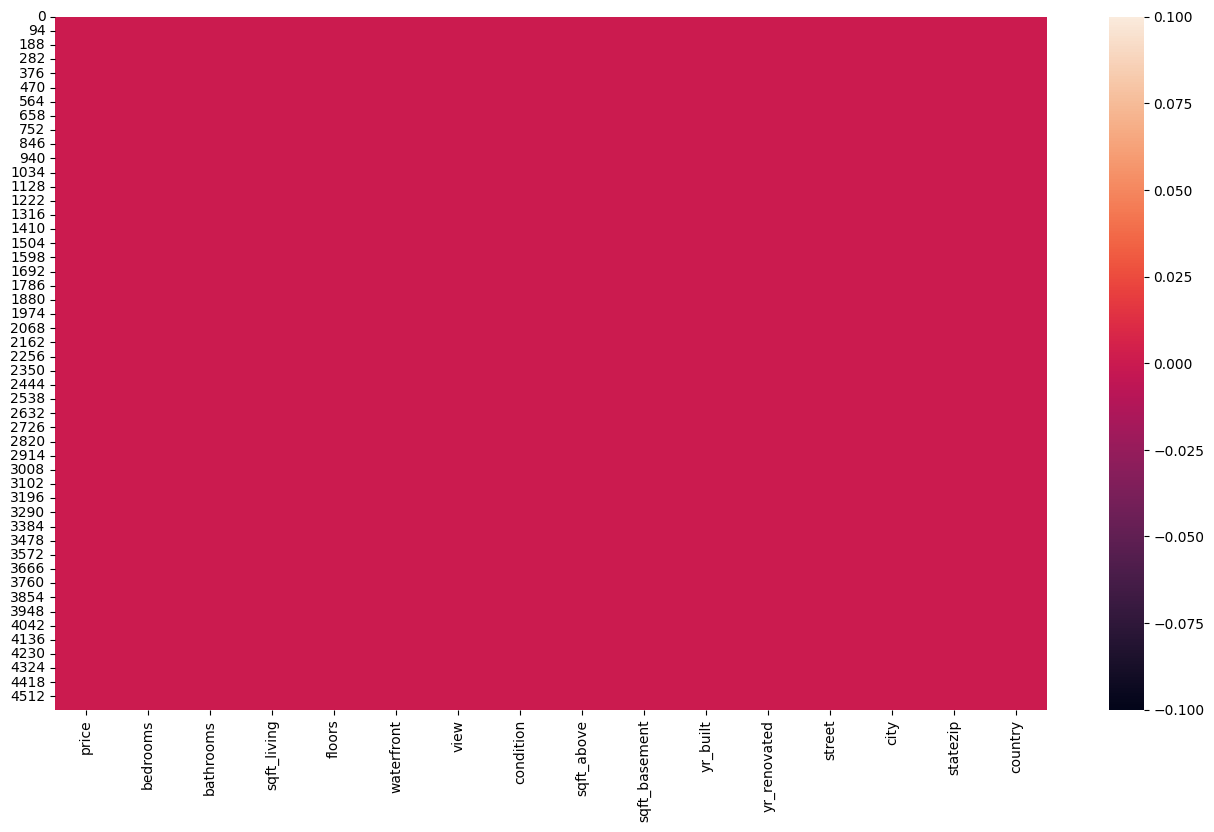

In [48]:
# Show the null values using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [49]:
# Get the percentages of null value
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
street           0.0
city             0.0
statezip         0.0
country          0.0
dtype: float64

In [50]:
col_for_drop = null_percent[null_percent > 20].keys() # if the null value % 20 or > 20 so need to drop it


In [51]:
# find the unique value count
for i in df.columns:
    print(i + "\t" + str(len(df[i].unique())))

price	1741
bedrooms	10
bathrooms	26
sqft_living	566
floors	3
waterfront	2
view	5
condition	5
sqft_above	511
sqft_basement	207
yr_built	115
yr_renovated	60
street	4525
city	44
statezip	77
country	1


In [52]:
# find unique values of each column
for i in df.columns:
    print("Unique value of:>>> {} ({})\n{}\n".format(i, len(df[i].unique()), df[i].unique()))

Unique value of:>>> price (1741)
[ 313000 2384000  342000 ...  416904  203400  220600]

Unique value of:>>> bedrooms (10)
[3 5 4 2 6 7 9 1 8 0]

Unique value of:>>> bathrooms (26)
[1.5  2.5  2.   2.25 1.   1.75 2.75 3.   3.25 3.5  8.   4.25 4.   3.75
 5.   4.5  5.75 1.25 6.5  4.75 0.75 5.25 5.5  6.25 0.   6.75]

Unique value of:>>> sqft_living (566)
[ 1340  3650  1930  2000  1940   880  1350  2710  2430  1520  1710  2920
  2330  1090  2910  1200  1570  3110  1370  1180  2240  1450  1750  2730
  1600  2090  2360  2200  2820  2600  1560  2860  1820  3630  3240   800
  1850  1960  2390  1580  1480   850  1770  1210  1160  1970  1270  3310
  1800  2210  1920  2190  3660  1320  1630  2680  2540   900  1650  1010
  2530  2850  2280  1900  1330  2170  2120  2490  1990  3690  2340  2110
  1140  1410  3180  2160  2350  2740  1680  3090  4010  2010  2370  1840
  2070  4340   840  1240  1390  2310  1050  2550  1120  2230   810  3190
  1670 13540  1880  1550  2050  2220  2300  1790  2440  3400  44

In [53]:
# Describe the target 
train["price"].describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

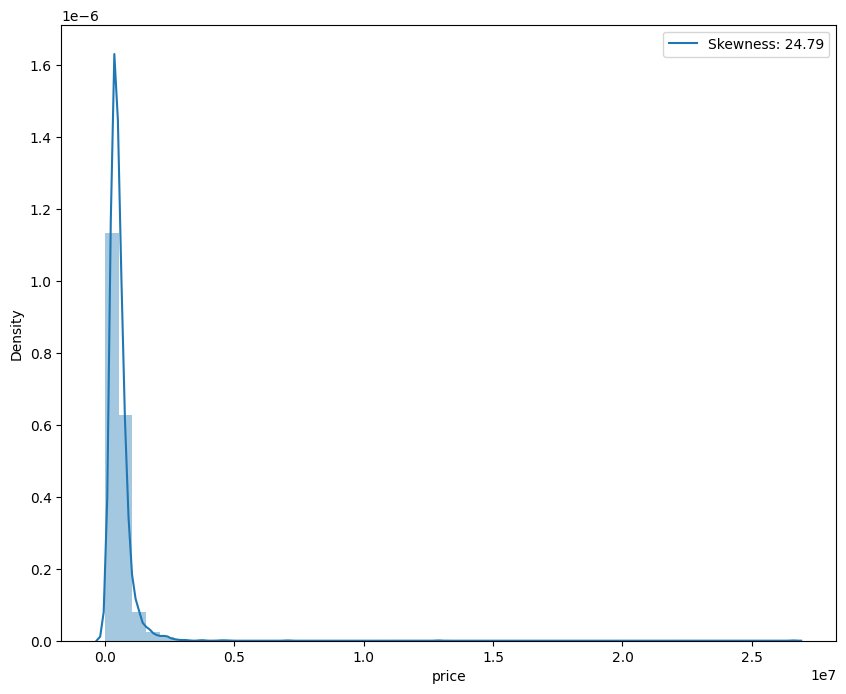

In [54]:
# Plot the distplot of target
plt.figure(figsize=(10,8))
bar = sns.distplot(train["price"])
bar.legend(["Skewness: {:.2f}".format(train['price'].skew())])

(18.5, -0.5)

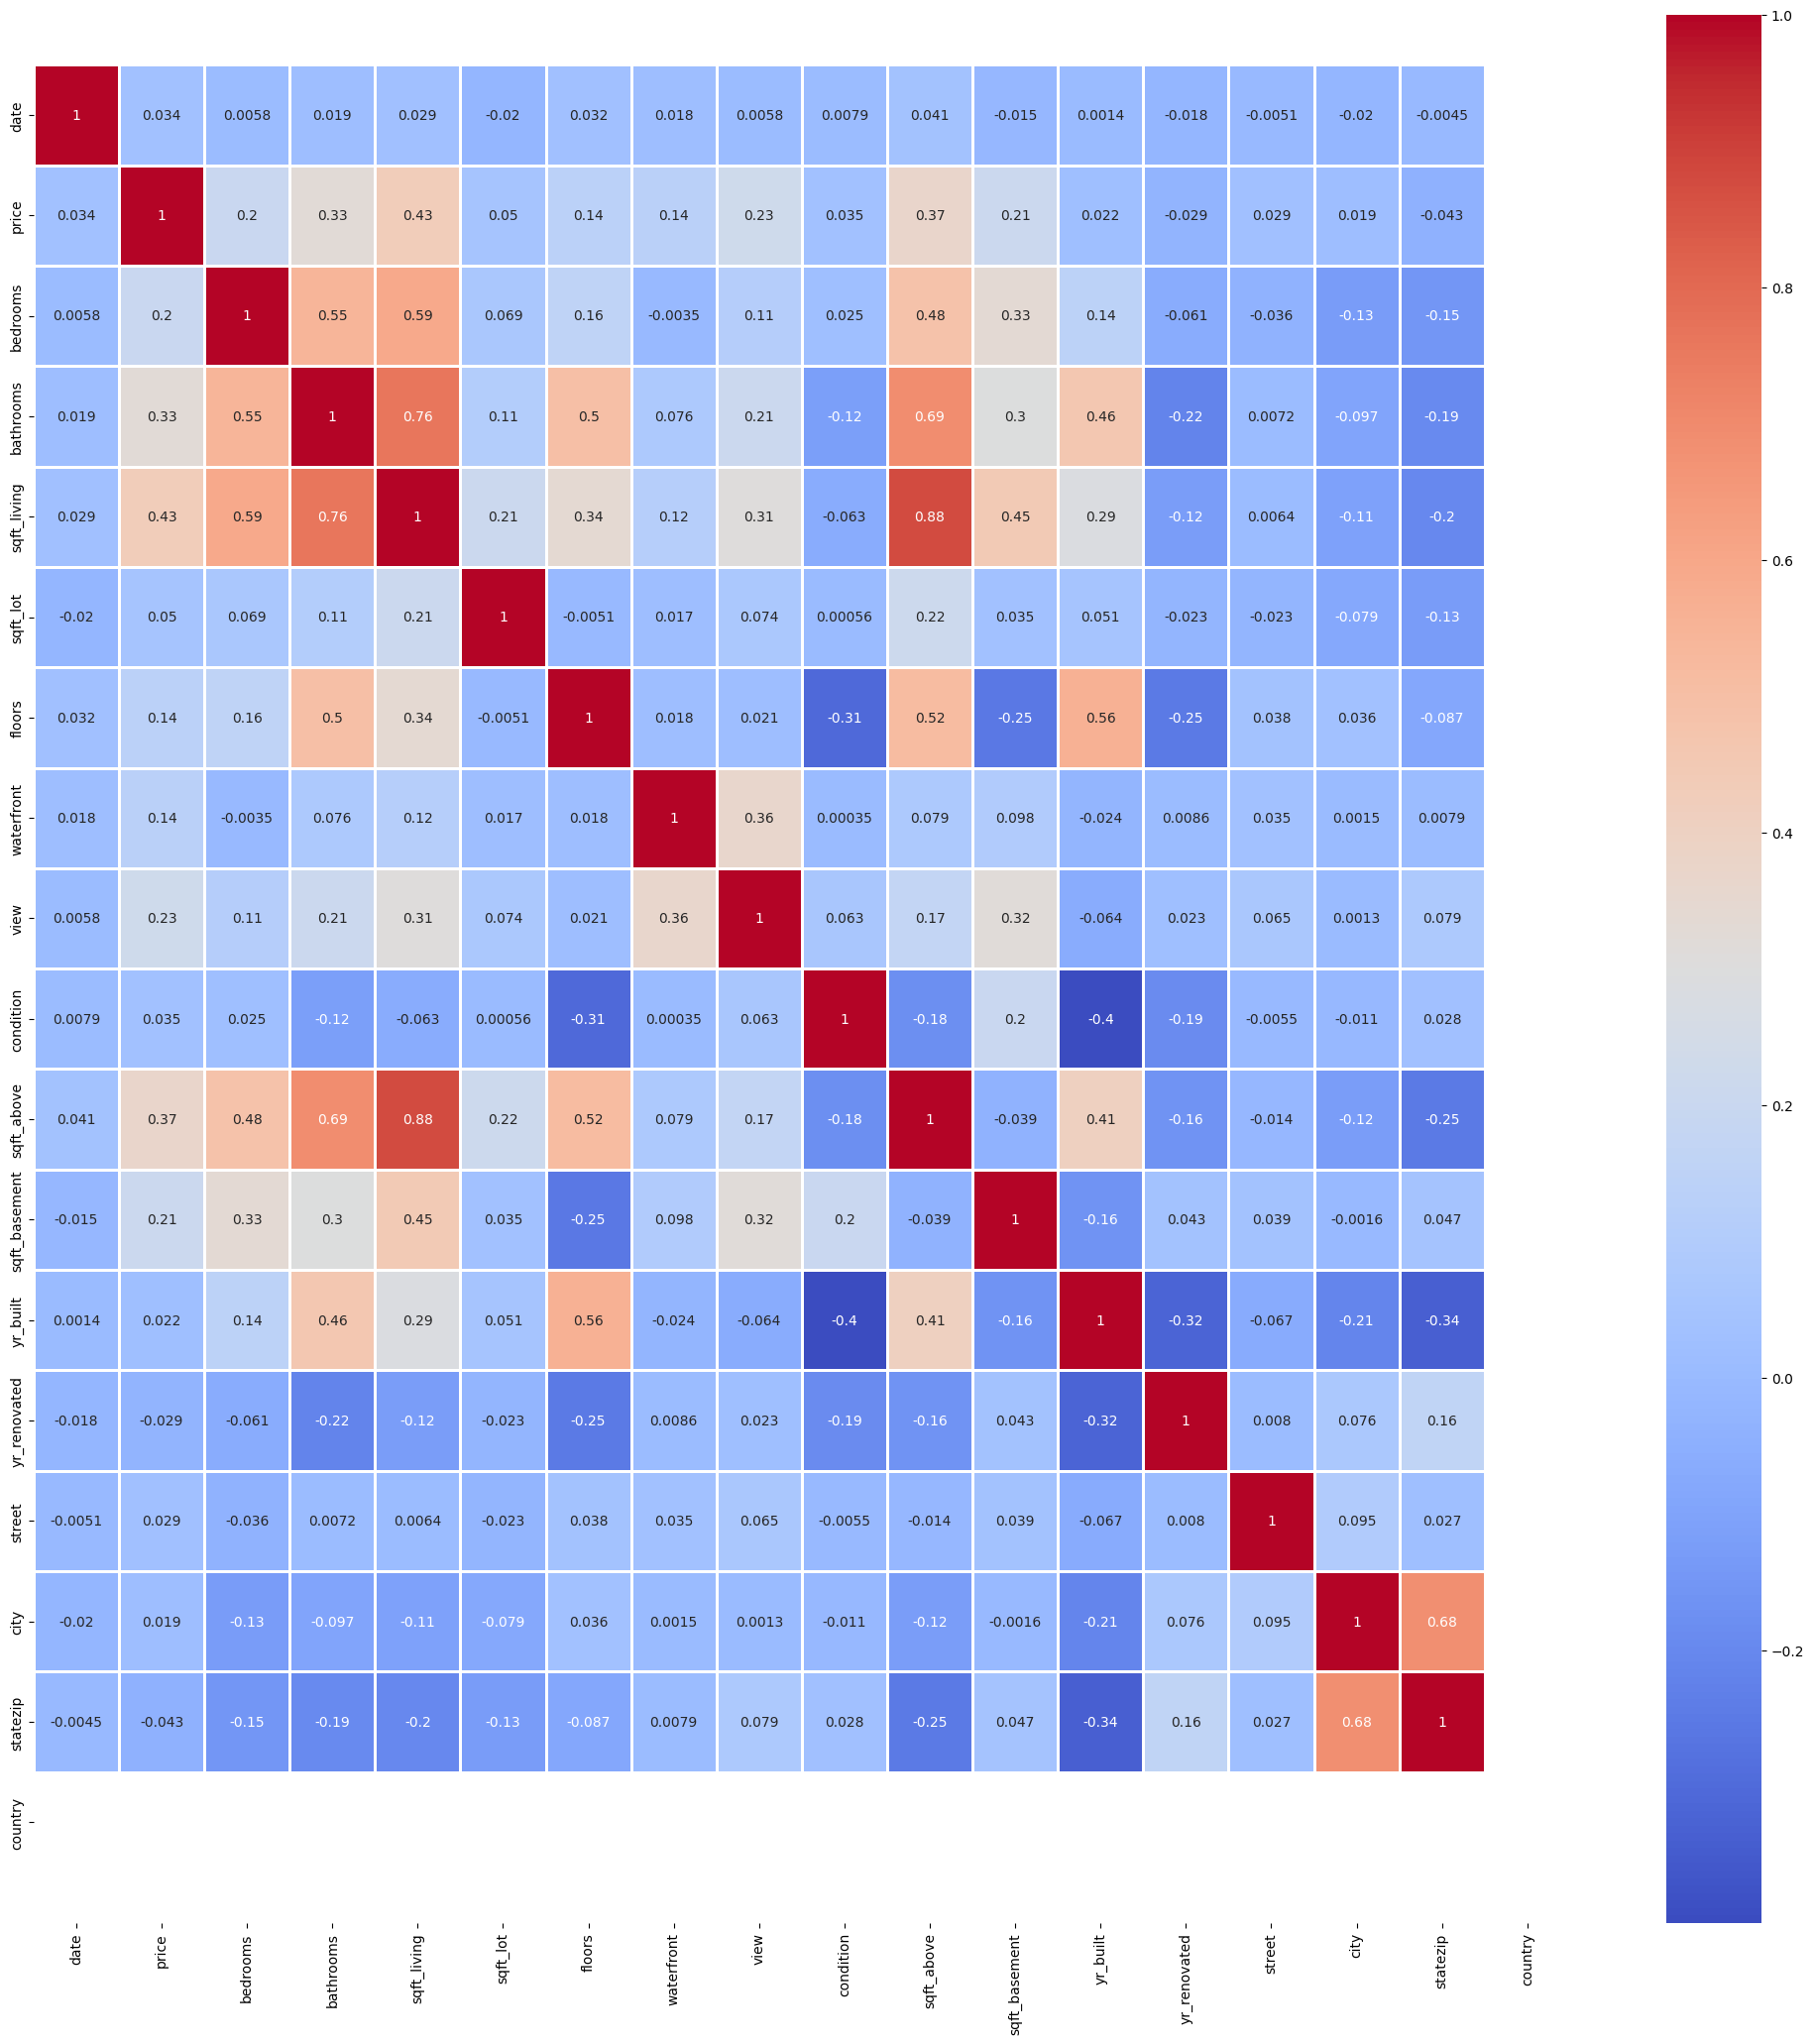

In [55]:
# correlation heatmap
plt.figure(figsize=(25,25))
ax = sns.heatmap(train0.corr(), cmap = "coolwarm", annot=True, linewidth=2)

# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [56]:
# correlation heatmap of higly correlated features with SalePrice
hig_corr = train0.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["price"]) >= 0.5]
hig_corr_features

Index(['price'], dtype='object')

(1.5, -0.5)

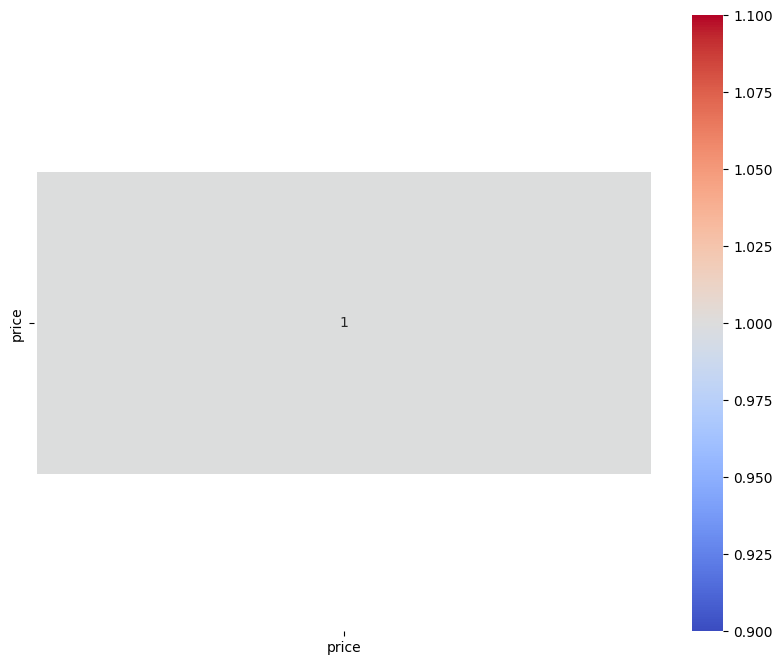

In [57]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(train0[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

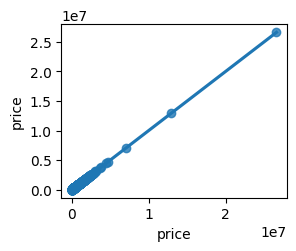

In [58]:
# Plot regplot to get the nature of highly correlated data
plt.figure(figsize=(16,9))
for i in range(len(hig_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data=train, x = hig_corr_features[i], y = 'price')

Handling Missing Value

In [59]:
missing_col = df.columns[df.isnull().any()]
missing_col


Index([], dtype='object')

Handling missing value of Bsmt feature

In [60]:
bsmt_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']
bsmt_feat = df[bsmt_col]
bsmt_feat

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000,3,1.50,1340,1,0,0,3,1340,0,1955,2005,1522,36,62,0
1,2384000,5,2.50,3650,2,0,4,5,3370,280,1921,0,3899,35,58,0
2,342000,3,2.00,1930,1,0,0,4,1930,0,1966,0,2291,18,26,0
3,420000,3,2.25,2000,1,0,0,4,1000,1000,1963,0,4263,3,7,0
4,550000,4,2.50,1940,1,0,0,4,1140,800,1976,1992,4352,31,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166,3,1.75,1510,1,0,0,4,1510,0,1954,1979,3447,35,62,0
4596,534333,3,2.50,1460,2,0,0,3,1460,0,1983,2009,960,3,6,0
4597,416904,3,2.50,3010,2,0,0,3,3010,0,2009,0,4033,32,37,0
4598,203400,4,2.00,2090,1,0,0,3,1070,1020,1974,0,3498,35,71,0


In [61]:
bsmt_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   int32  
 1   bedrooms       4600 non-null   int32  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   floors         4600 non-null   int32  
 5   waterfront     4600 non-null   int64  
 6   view           4600 non-null   int64  
 7   condition      4600 non-null   int64  
 8   sqft_above     4600 non-null   int64  
 9   sqft_basement  4600 non-null   int64  
 10  yr_built       4600 non-null   int64  
 11  yr_renovated   4600 non-null   int64  
 12  street         4600 non-null   int32  
 13  city           4600 non-null   int32  
 14  statezip       4600 non-null   int32  
 15  country        4600 non-null   int32  
dtypes: float64(1), int32(7), int64(8)
memory usage: 449.3 KB


In [62]:
bsmt_feat.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [63]:
bsmt_feat = bsmt_feat[bsmt_feat.isnull().any(axis=1)]
bsmt_feat

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [64]:
bsmt_feat_all_nan = bsmt_feat[(bsmt_feat.isnull() | bsmt_feat.isin([0])).all(1)]
bsmt_feat_all_nan

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [65]:
bsmt_feat_all_nan.shape

(0, 16)

In [66]:
qual = list(df.loc[:, df.dtypes == 'object'].columns.values)
qual

[]

In [67]:
bsmt_feat.shape

(0, 16)

In [68]:
print(df['price'].max())
print(df['price'].min())

26590000
0


In [69]:
# Print the column names
print(df.columns)

# Check the DataFrame structure
print(df.head())

# Iterate over the column names and print any irregularities
for column in df.columns:
    print(repr(column))


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'street', 'city', 'statezip', 'country'],
      dtype='object')
     price  bedrooms  bathrooms  sqft_living  floors  waterfront  view  \
0   313000         3       1.50         1340       1           0     0   
1  2384000         5       2.50         3650       2           0     4   
2   342000         3       2.00         1930       1           0     0   
3   420000         3       2.25         2000       1           0     0   
4   550000         4       2.50         1940       1           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  street  city  \
0          3        1340              0      1955          2005    1522    36   
1          5        3370            280      1921             0    3899    35   
2          4        1930              0      1966             0    2291   

In [70]:
df.columns[df.isnull().any()]

Index([], dtype='object')

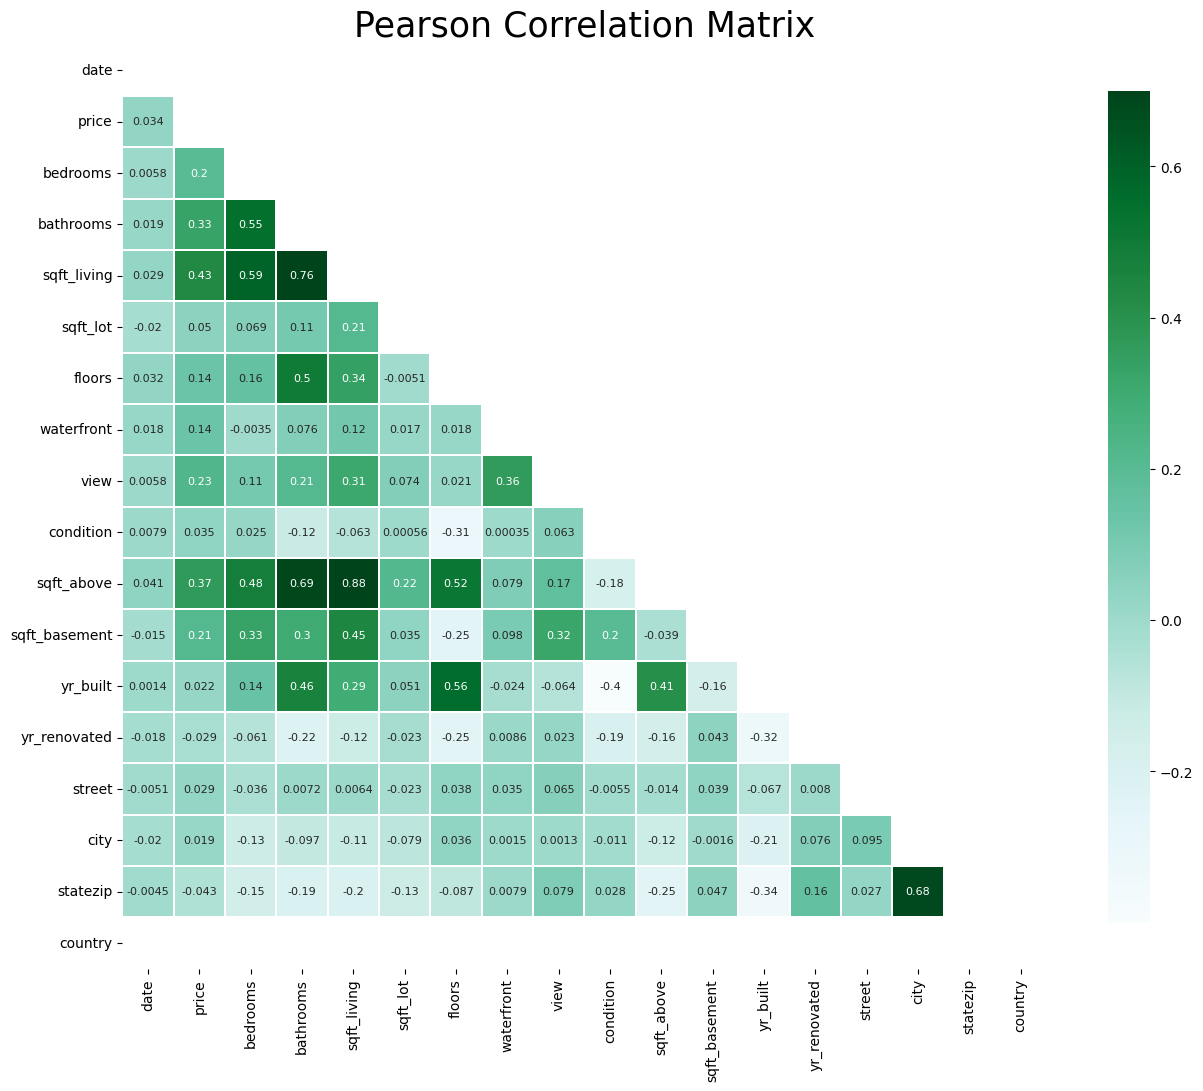

In [71]:
mask = np.zeros_like(train0[features].corr(), dtype= bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(train0[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

<Axes: xlabel='yr_built', ylabel='Density'>

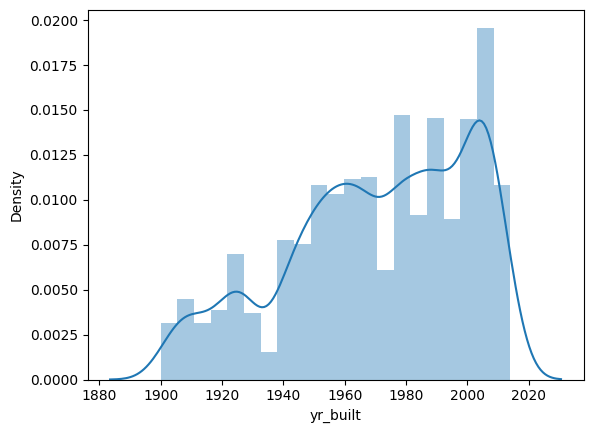

In [72]:
sns.distplot(train0['yr_built'])

In [73]:
train0.describe(percentiles=[.01, .02, .03, .05, .1, .5, .9, .92, .93, .99])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0
mean,36.135217,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.459130,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,2265.385870,25.674348,38.743696,0.0
std,19.708177,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.552194,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,1307.591795,11.982721,20.919517,0.0
min,0.000000,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.0
1%,0.000000,0.000000e+00,2.000000,1.000000,720.000000,1.026950e+03,1.000000,0.000000,0.000000,3.000000,709.900000,0.000000,1903.000000,0.000000,45.990000,1.000000,0.000000,0.0
2%,3.000000,1.424860e+05,2.000000,1.000000,800.000000,1.200000e+03,1.000000,0.000000,0.000000,3.000000,760.000000,0.000000,1906.000000,0.000000,90.980000,1.000000,1.000000,0.0
3%,3.000000,1.699550e+05,2.000000,1.000000,860.000000,1.317820e+03,1.000000,0.000000,0.000000,3.000000,800.000000,0.000000,1909.000000,0.000000,136.970000,1.000000,2.000000,0.0
5%,4.000000,2.000000e+05,2.000000,1.000000,950.000000,1.690800e+03,1.000000,0.000000,0.000000,3.000000,860.000000,0.000000,1913.000000,0.000000,227.000000,3.000000,4.000000,0.0
10%,7.000000,2.399500e+05,2.000000,1.000000,1110.000000,3.300000e+03,1.000000,0.000000,0.000000,3.000000,970.000000,0.000000,1925.000000,0.000000,451.900000,3.000000,8.000000,0.0
50%,38.000000,4.609430e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,2263.500000,32.000000,41.000000,0.0


In [74]:
train0 = train0[(
                (train0['price'] <= 1000000) & 
                (train0['price'] > 150000) & 
                (train0['bathrooms'] <= 6) & 
                (train0['condition'] > 2) & 
                (train0['sqft_living'] > 800) & 
                (train0['bedrooms'] >= 1) & 
                (train0['bedrooms'] <= 4.5) 
                )]

In [75]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3720 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3720 non-null   int32  
 1   price          3720 non-null   int32  
 2   bedrooms       3720 non-null   int32  
 3   bathrooms      3720 non-null   float64
 4   sqft_living    3720 non-null   int64  
 5   sqft_lot       3720 non-null   int64  
 6   floors         3720 non-null   int32  
 7   waterfront     3720 non-null   int64  
 8   view           3720 non-null   int64  
 9   condition      3720 non-null   int64  
 10  sqft_above     3720 non-null   int64  
 11  sqft_basement  3720 non-null   int64  
 12  yr_built       3720 non-null   int64  
 13  yr_renovated   3720 non-null   int64  
 14  street         3720 non-null   int32  
 15  city           3720 non-null   int32  
 16  statezip       3720 non-null   int32  
 17  country        3720 non-null   int32  
dtypes: float

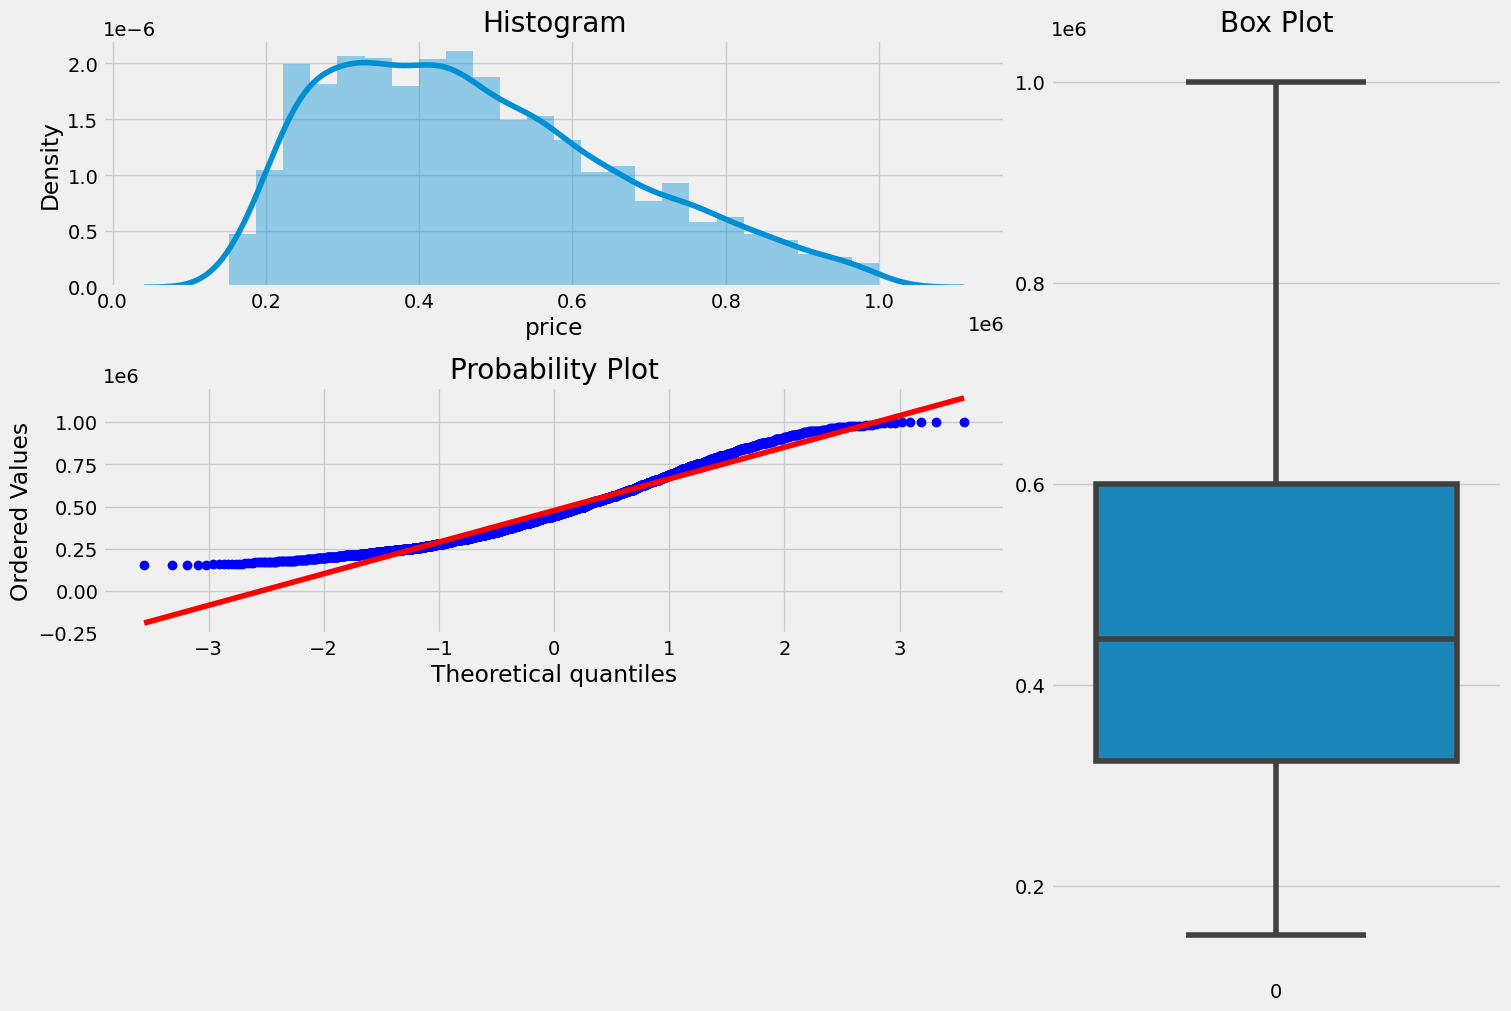

In [76]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train0, 'price')

<Axes: ylabel='price'>

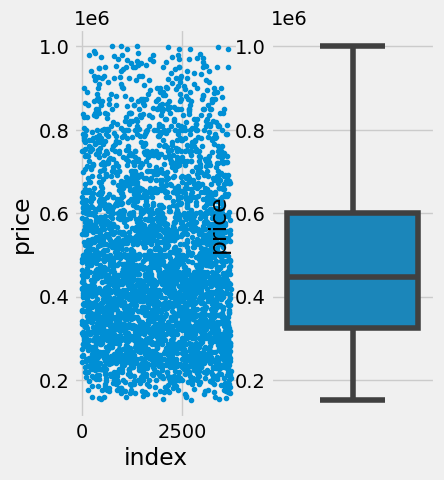

In [77]:
y = np.array(train0.price)
plt.subplot(131)
plt.plot(range(len(y)),y,'.');plt.ylabel('price');plt.xlabel('index');
plt.subplot(132)
sns.boxplot(y=train0.price)

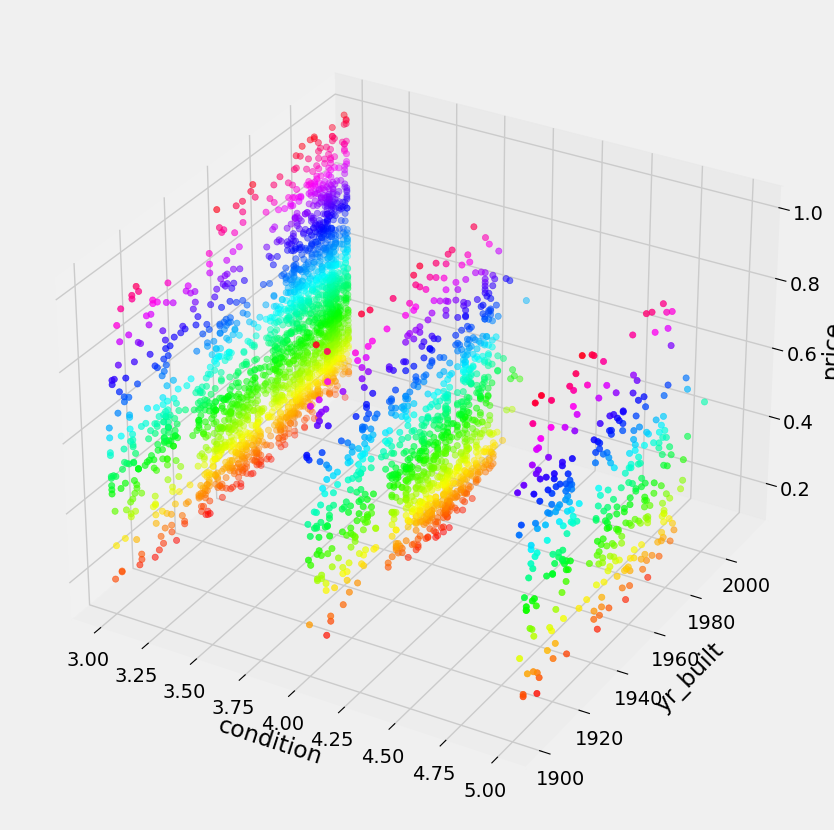

In [78]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

z_points = train0['price']
x_points = train0['condition']
y_points = train0['yr_built']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

ax.set_xlabel('condition')
ax.set_ylabel('yr_built')
ax.set_zlabel('price')

plt.show()

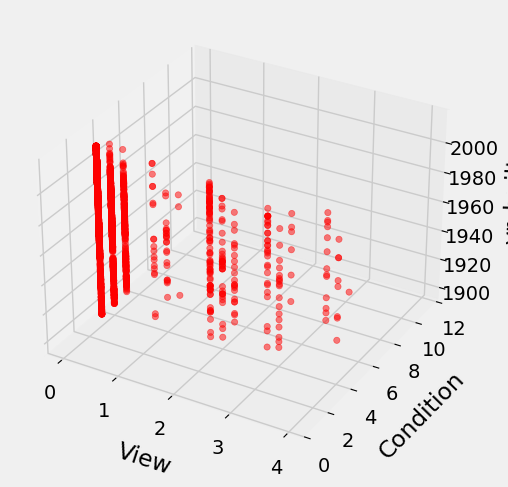

In [79]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(train0['view'],train0['condition'],train0['yr_built'],c="red",alpha=.5)
ax.set(xlabel='\nView',ylabel='\nCondition',zlabel='\nyr_built')
ax.set(ylim=[0,12])
plt.show()

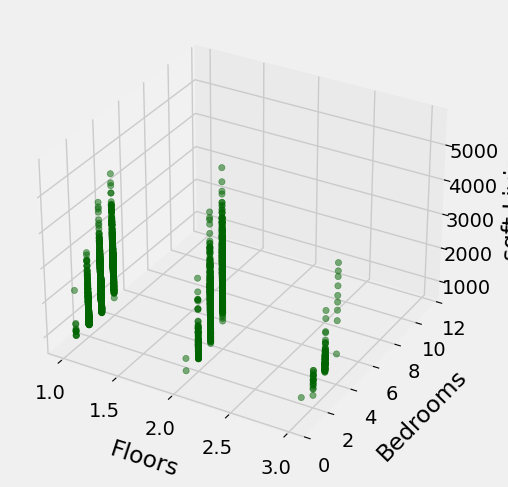

In [80]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(train0['floors'],train0['bedrooms'],train0['sqft_living'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft Living')
ax.set(ylim=[0,12])
plt.show()

In [81]:
grpby_bedrooms_df = train0[["price", "bedrooms"]].groupby(by = "bedrooms", as_index = False)
grpby_bedrooms_df = grpby_bedrooms_df.mean().astype(int)
grpby_bedrooms_df.head()


,bedrooms,price
0,1,344921
1,2,409449
2,3,444431
3,4,547698


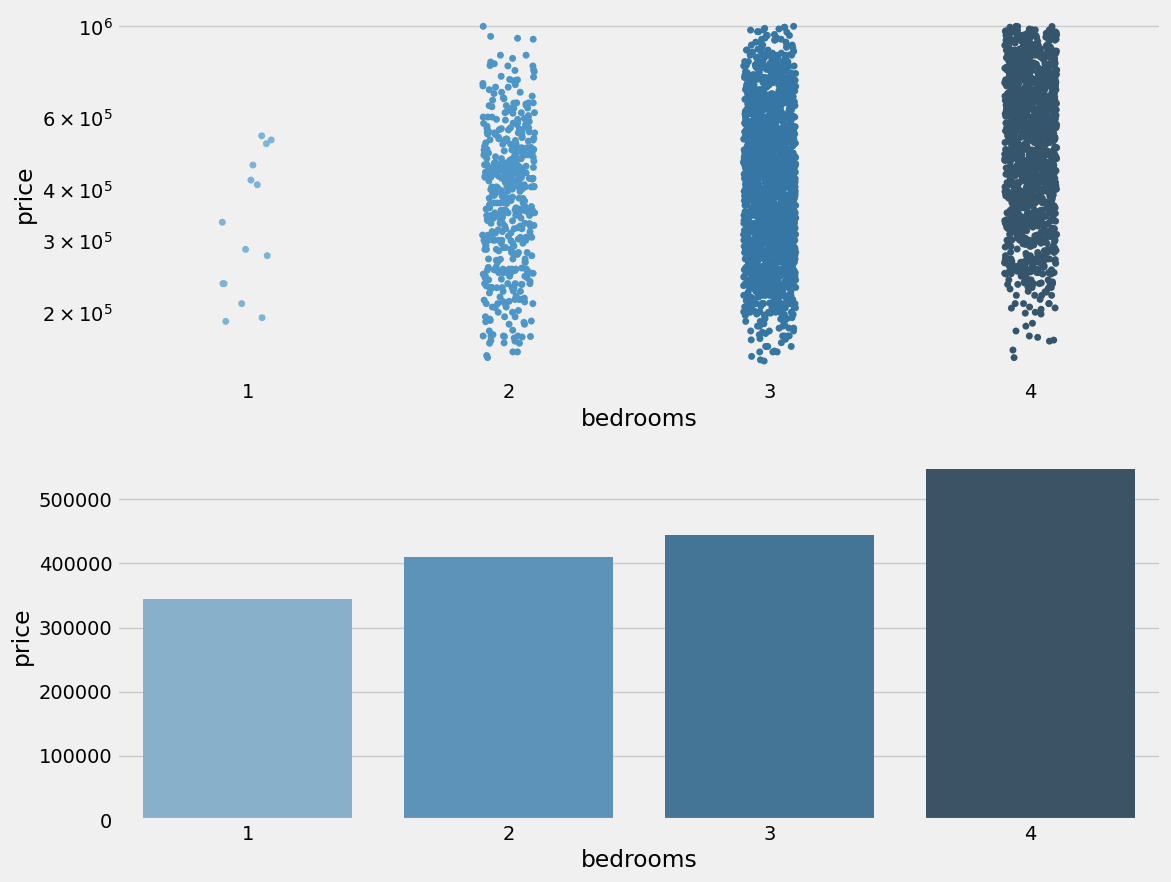

In [82]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.set(yscale = "log")
sns.stripplot(x = "bedrooms", y = "price", data = train0, ax = ax1, jitter=True, palette="Blues_d")
sns.barplot(x = "bedrooms", y = "price", data = grpby_bedrooms_df, ax = ax2, palette="Blues_d")
plt.show()

4. FE: building the feature importance diagrams


4.1 LGBM

In [83]:
train_fe = copy.deepcopy(train0)
target_fe = train_fe['price']
del train_fe['price']

In [84]:
X = train_fe
z = target_fe

In [85]:
Xtrain, Xval, Ztrain, Zval = train_test_split(X, z, test_size=0.2, random_state=0)
train_set = lgb.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgb.Dataset(Xval, Zval, silent=False)

In [86]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': True,
        'seed':0,        
    }

modelL = lgb.train(params, train_set = train_set, num_boost_round=1000,
                   early_stopping_rounds=50,verbose_eval=10, valid_sets=valid_set)

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2834
[LightGBM] [Info] Number of data points in the train set: 2976, number of used features: 16
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Start training from score 475842.588374
Training until validation scores don't improve for 50 rounds
[10]	valid_0's rmse: 154695
[20]	valid_0's rmse: 134839
[30]	valid_0's rmse: 121247
[40]	valid_0's rmse: 112538


[50]	valid_0's rmse: 106082
[60]	valid_0's rmse: 101887
[70]	valid_0's rmse: 99042.6
[80]	valid_0's rmse: 97222.9
[90]	valid_0's rmse: 95306.8
[100]	valid_0's rmse: 94193.4
[110]	valid_0's rmse: 93548.8
[120]	valid_0's rmse: 93008.4
[130]	valid_0's rmse: 92659.2
[140]	valid_0's rmse: 92433
[150]	valid_0's rmse: 92193.1
[160]	valid_0's rmse: 92103.4
[170]	valid_0's rmse: 91906.5
[180]	valid_0's rmse: 91760.5
[190]	valid_0's rmse: 91735.4
[200]	valid_0's rmse: 91529.6
[210]	valid_0's rmse: 91567.4
[220]	valid_0's rmse: 91592.5
[230]	valid_0's rmse: 91525.6
[240]	valid_0's rmse: 91535.5
[250]	valid_0's rmse: 91554.6
[260]	valid_0's rmse: 91458.2
[270]	valid_0's rmse: 91569.4
[280]	valid_0's rmse: 91504.3
[290]	valid_0's rmse: 91602.3
[300]	valid_0's rmse: 91624.3
[310]	valid_0's rmse: 91728.4
Early stopping, best iteration is:
[261]	valid_0's rmse: 91438.7


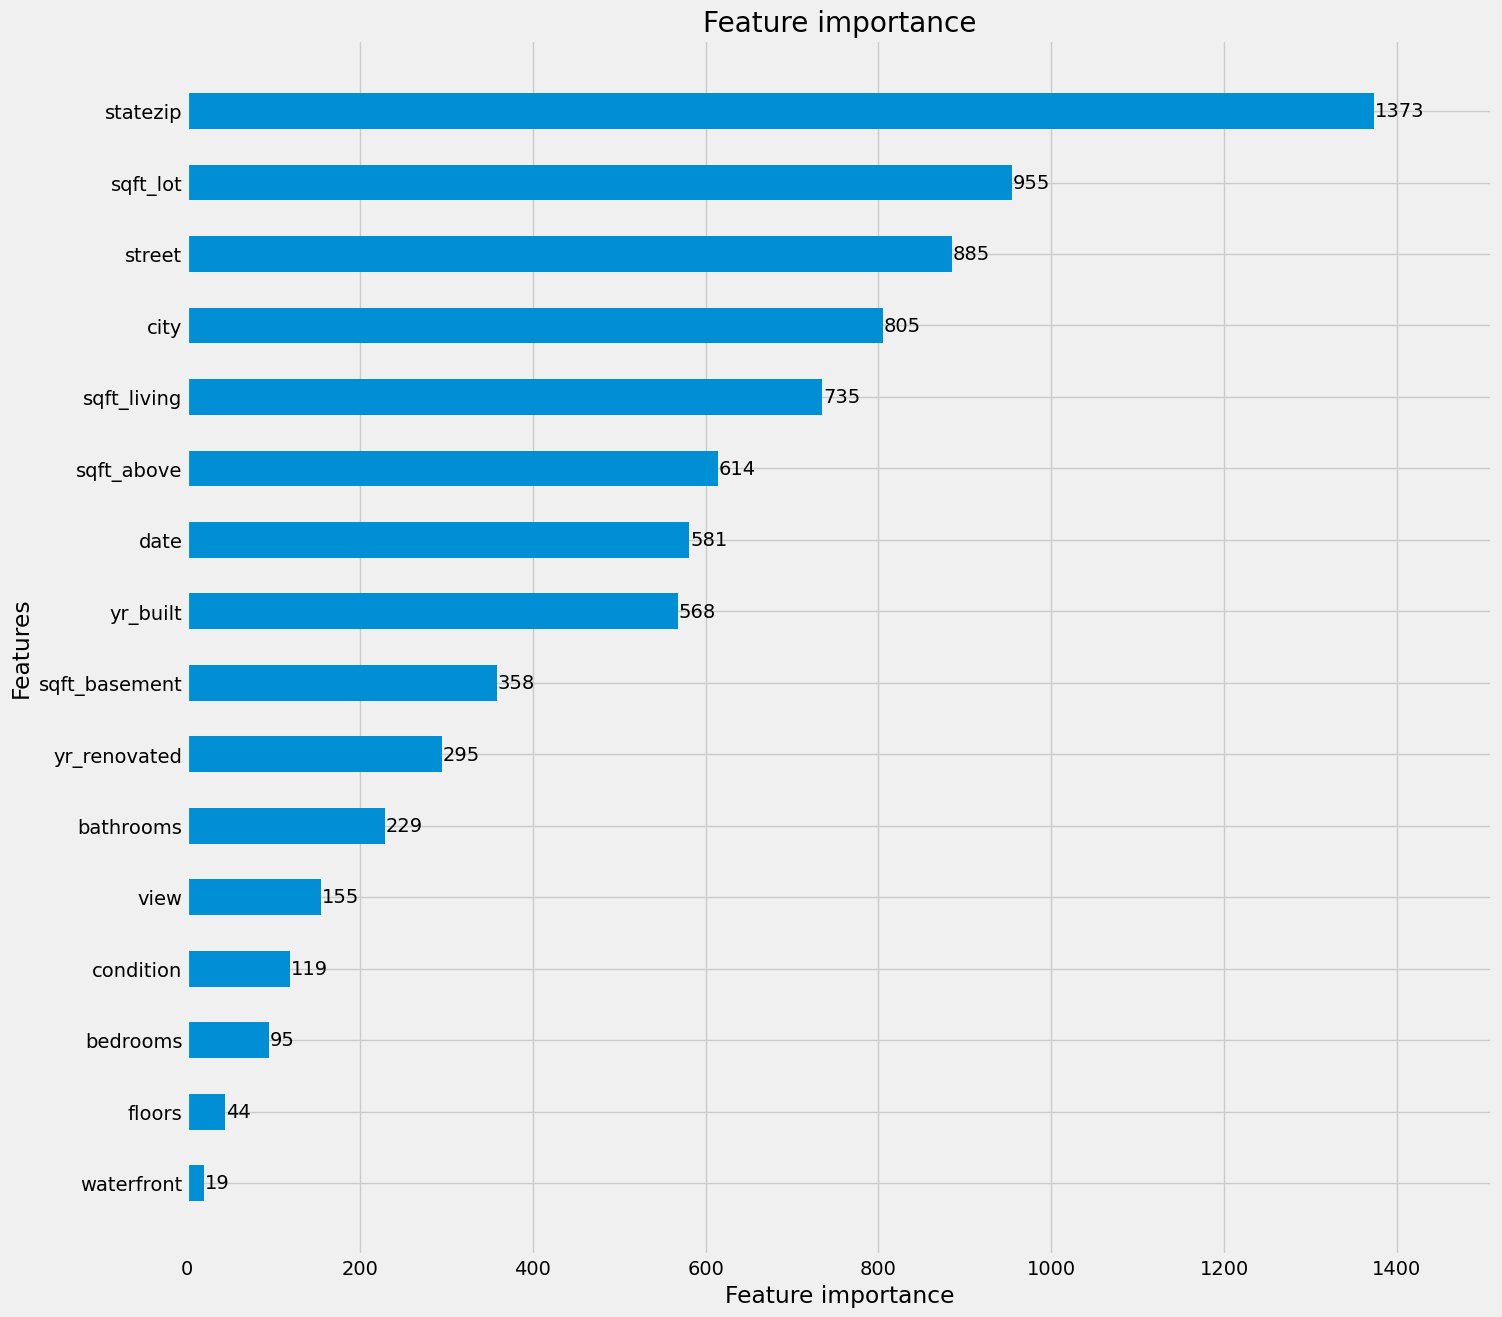

In [87]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
lgb.plot_importance(modelL,ax = axes,height = 0.5)
plt.show();plt.close()

In [88]:
feature_score = pd.DataFrame(train_fe.columns, columns = ['feature']) 
feature_score['score_lgb'] = modelL.feature_importance()

4.2 XGB

In [89]:
data_tr  = xgb.DMatrix(Xtrain, label=Ztrain)
data_cv  = xgb.DMatrix(Xval   , label=Zval)
evallist = [(data_tr, 'train'), (data_cv, 'valid')]

In [90]:
parms = {'max_depth':8, #maximum depth of a tree
         'objective':'reg:squarederror',
         'eta'      :0.3,
         'subsample':0.8,#SGD will use this percentage of data
         'lambda'  :4, #L2 regularization term,>1 more conservative 
         'colsample_bytree':0.9,
         'colsample_bylevel':1,
         'min_child_weight': 10}
modelx = xgb.train(parms, data_tr, num_boost_round=200, evals = evallist,
                  early_stopping_rounds=30, maximize=False, 
                  verbose_eval=10)

print('score = %1.5f, n_boost_round =%d.'%(modelx.best_score,modelx.best_iteration))

[0]	train-rmse:374461.31336	valid-rmse:378705.58967
[10]	train-rmse:84550.46019	valid-rmse:105332.62831


[20]	train-rmse:68327.11757	valid-rmse:97171.95292
[30]	train-rmse:56772.58385	valid-rmse:97200.94015
[40]	train-rmse:50216.37058	valid-rmse:97561.69963
[50]	train-rmse:43827.88089	valid-rmse:97194.53369
[53]	train-rmse:41338.00195	valid-rmse:97292.80874
score = 96073.50946, n_boost_round =24.


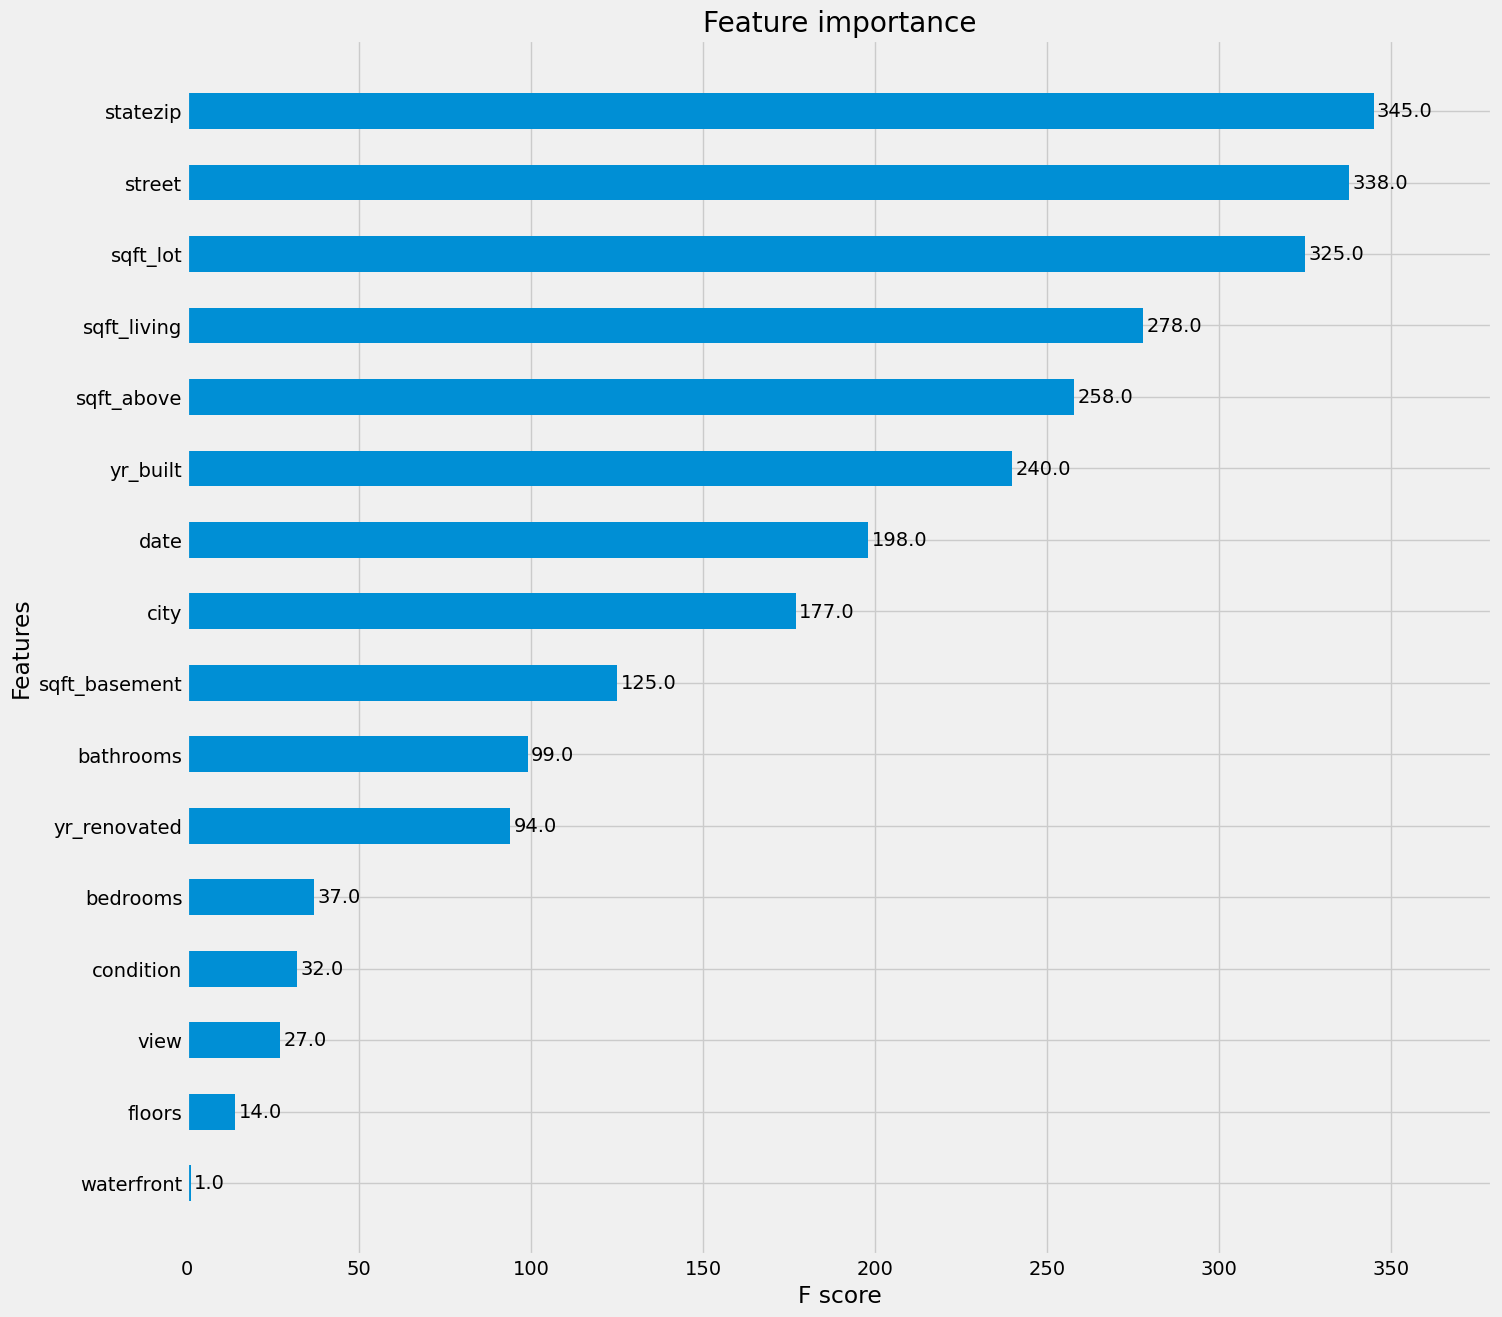

In [91]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
xgb.plot_importance(modelx,ax = axes,height = 0.5)
plt.show();plt.close()

In [92]:
feature_score['score_xgb'] = feature_score['feature'].map(modelx.get_score(importance_type='weight'))
feature_score

,feature,score_lgb,score_xgb
0,date,581,198.0
1,bedrooms,95,37.0
2,bathrooms,229,99.0
3,sqft_living,735,278.0
4,sqft_lot,955,325.0
5,floors,44,14.0
6,waterfront,19,1.0
7,view,155,27.0
8,condition,119,32.0
9,sqft_above,614,258.0


4.3 Logistic Regression

In [93]:
train_fe = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(train_fe),
    columns=train_fe.columns,
    index=train_fe.index
)

In [94]:
logreg = LogisticRegression()
logreg.fit(train_fe, target_fe)
coeff_logreg = pd.DataFrame(train_fe.columns.delete(0))
coeff_logreg.columns = ['feature']
coeff_logreg["score_logreg"] = pd.Series(logreg.coef_[0])
coeff_logreg.sort_values(by='score_logreg', ascending=False)

,feature,score_logreg
0,bedrooms,0.241155
8,sqft_above,0.230485
15,country,0.109095
6,view,-0.003146
4,floors,-0.016471
11,yr_renovated,-0.024734
7,condition,-0.034018
1,bathrooms,-0.072052
10,yr_built,-0.114490
9,sqft_basement,-0.132931


In [95]:
coeff_logreg["score_logreg"] = coeff_logreg["score_logreg"].abs()
feature_score = pd.merge(feature_score, coeff_logreg, on='feature')

4.4 Linear Regression

In [96]:
linreg = LinearRegression()
linreg.fit(train_fe, target_fe)
coeff_linreg = pd.DataFrame(train_fe.columns.delete(0))
coeff_linreg.columns = ['feature']
coeff_linreg["score_linreg"] = pd.Series(linreg.coef_)
coeff_linreg.sort_values(by='score_linreg', ascending=False)

,feature,score_linreg
3,sqft_lot,386411.206055
9,sqft_basement,361564.103979
2,sqft_living,171311.027117
14,statezip,161110.446654
10,yr_built,121636.486334
7,condition,96412.304563
5,waterfront,73831.298749
6,view,58061.695321
8,sqft_above,33924.112820
13,city,22442.306197


In [97]:
coeff_linreg["score_linreg"] = coeff_linreg["score_linreg"].abs()
feature_score = pd.merge(feature_score, coeff_linreg, on='feature')
feature_score = feature_score.fillna(0)
feature_score = feature_score.set_index('feature')
feature_score


,score_lgb,score_xgb,score_logreg,score_linreg
feature,,,,
bedrooms,95,37.0,0.241155,8046.134931
bathrooms,229,99.0,0.072052,57394.007338
sqft_living,735,278.0,0.274024,171311.027117
sqft_lot,955,325.0,0.173008,386411.206055
floors,44,14.0,0.016471,40543.416154
waterfront,19,1.0,0.206592,73831.298749
view,155,27.0,0.003146,58061.695321
condition,119,32.0,0.034018,96412.304563
sqft_above,614,258.0,0.230485,33924.112820


5. Comparison of the all feature importance diagrams

<Axes: xlabel='feature'>

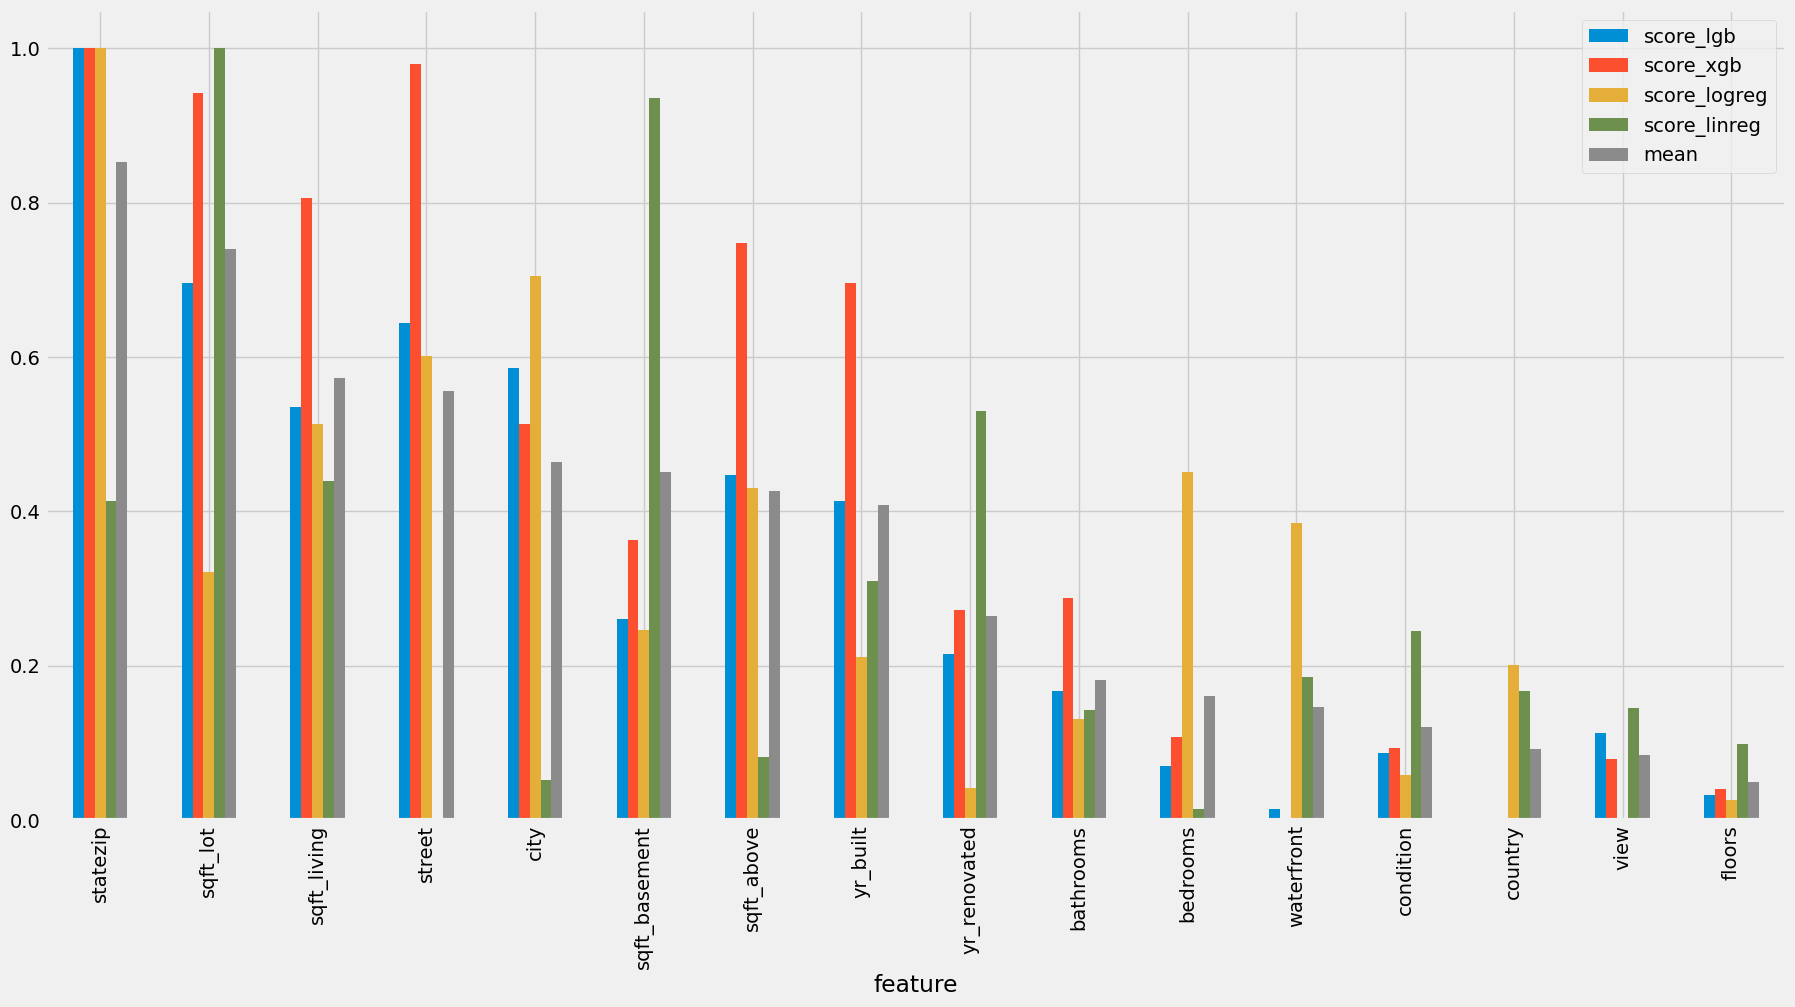

In [98]:
# MinMax scale all importances
feature_score = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(feature_score),
    columns=feature_score.columns,
    index=feature_score.index
)

# Create mean column
feature_score['mean'] = feature_score.mean(axis=1)

# Plot the feature importances
feature_score.sort_values('mean', ascending=False).plot(kind='bar', figsize=(20, 10))


In [99]:
feature_score.sort_values('mean', ascending=False)

,score_lgb,score_xgb,score_logreg,score_linreg,mean
feature,,,,,
statezip,1.000000,1.000000,1.000000,0.413017,0.853254
sqft_lot,0.695557,0.942029,0.321415,1.000000,0.739750
sqft_living,0.535324,0.805797,0.512559,0.439592,0.573318
street,0.644574,0.979710,0.601756,0.000000,0.556510
city,0.586307,0.513043,0.704773,0.051740,0.463966
sqft_basement,0.260743,0.362319,0.245581,0.935265,0.450977
sqft_above,0.447196,0.747826,0.430174,0.081654,0.426713
yr_built,0.413693,0.695652,0.210686,0.310174,0.407551
yr_renovated,0.214858,0.272464,0.040848,0.529709,0.264470


<Axes: xlabel='feature'>

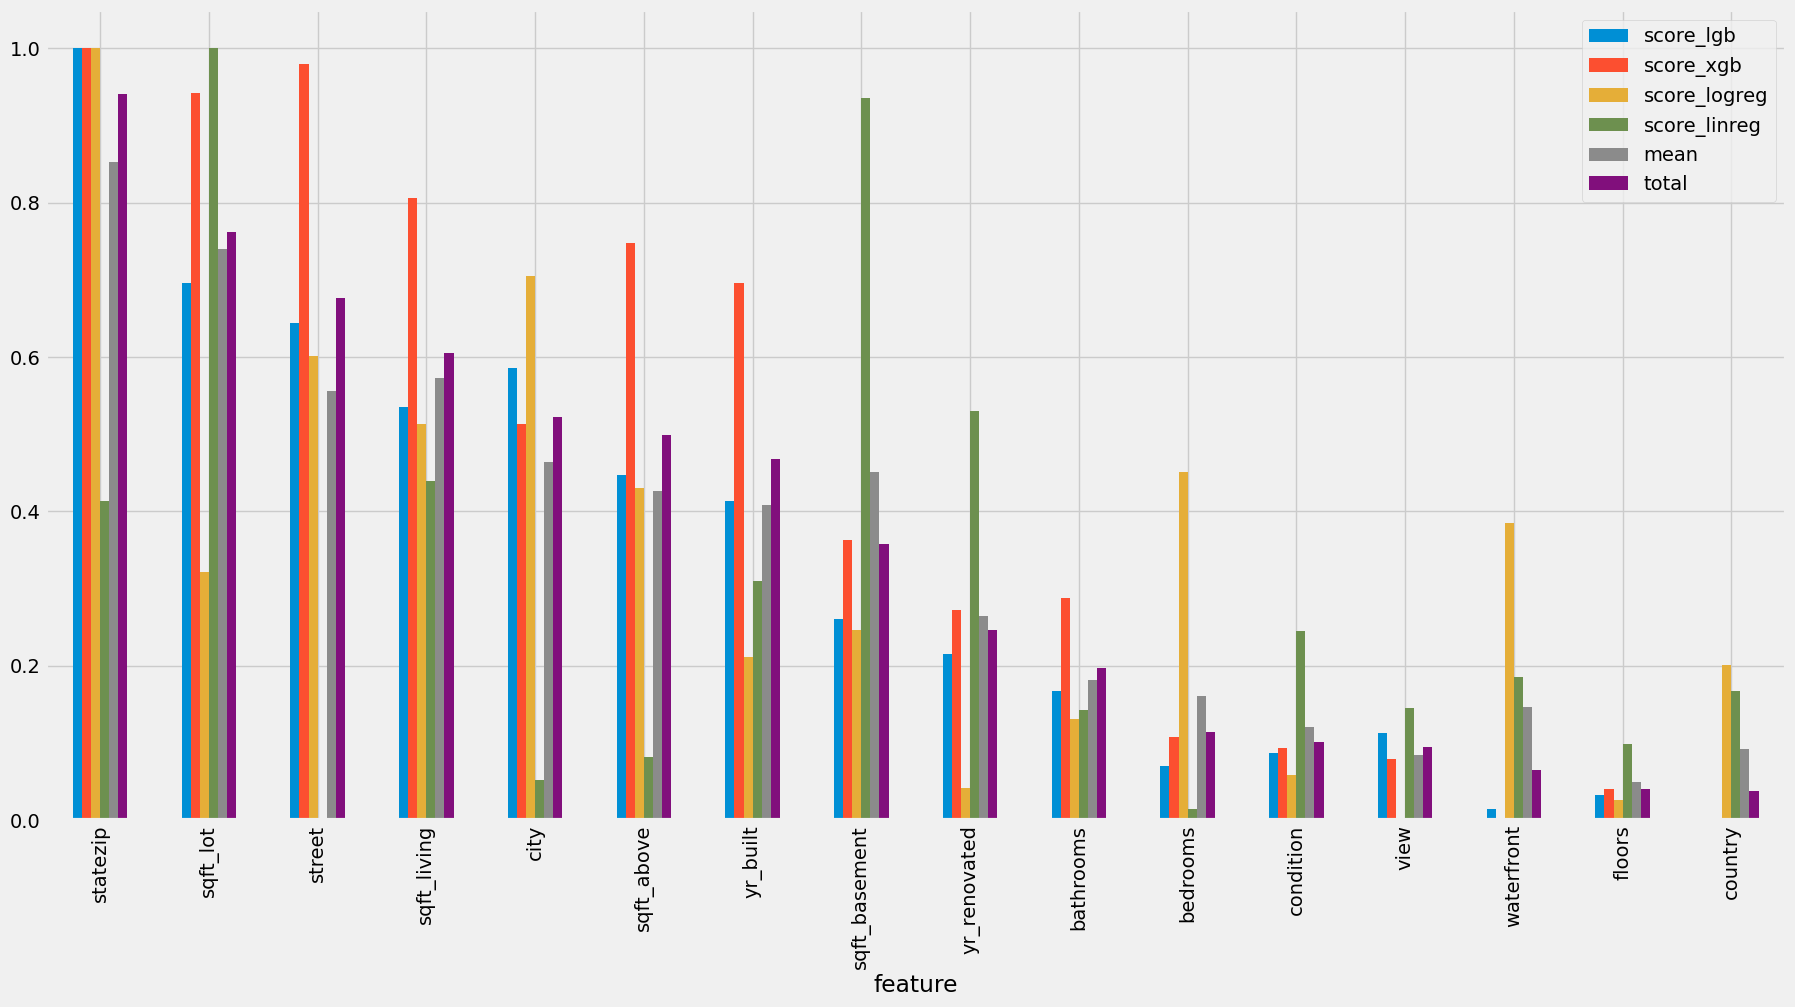

In [100]:
# Create total column with different weights
feature_score['total'] = 0.5*feature_score['score_lgb'] + 0.3*feature_score['score_xgb'] \
                       + 0.1*feature_score['score_logreg'] + 0.1*feature_score['score_linreg']

# Plot the feature importances
feature_score.sort_values('total', ascending=False).plot(kind='bar', figsize=(20, 10))

In [101]:
feature_score.sort_values('total', ascending=False)


,score_lgb,score_xgb,score_logreg,score_linreg,mean,total
feature,,,,,,
statezip,1.000000,1.000000,1.000000,0.413017,0.853254,0.941302
sqft_lot,0.695557,0.942029,0.321415,1.000000,0.739750,0.762529
street,0.644574,0.979710,0.601756,0.000000,0.556510,0.676376
sqft_living,0.535324,0.805797,0.512559,0.439592,0.573318,0.604616
city,0.586307,0.513043,0.704773,0.051740,0.463966,0.522718
sqft_above,0.447196,0.747826,0.430174,0.081654,0.426713,0.499129
yr_built,0.413693,0.695652,0.210686,0.310174,0.407551,0.467628
sqft_basement,0.260743,0.362319,0.245581,0.935265,0.450977,0.357152
yr_renovated,0.214858,0.272464,0.040848,0.529709,0.264470,0.246224


6. Dada for modeling

In [102]:
target_name = 'price'
train_target0 = train0[target_name]
train0 = train0.drop([target_name], axis=1)

In [103]:
# Synthesis test0 from train0
train0, test0, train_target0, test_target0 = train_test_split(train0, train_target0, test_size=0.2, random_state=0)

In [104]:
train0b = train0
train_target0b = train_target0
# Synthesis valid as test for selection models
trainb, testb, targetb, target_testb = train_test_split(train0b, train_target0b, test_size=valid_part, random_state=0)

In [105]:
#For models from Sklearn
scaler = StandardScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)

In [106]:
train0.head(3)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0.547687,1.159940,-0.474931,-0.213526,-0.171179,-0.816707,-0.058065,-0.25505,0.861578,-0.911472,1.215224,0.273110,-0.836333,-1.295291,-0.659430,-0.969958,0.0
1,-1.186808,-0.335072,0.666744,-0.397024,-0.276592,0.971755,-0.058065,-0.25505,-0.694281,-0.026586,-0.669818,1.052604,-0.836333,1.503512,-0.996031,-1.261652,0.0
2,0.649716,-1.830083,-1.616606,-1.003980,-0.312888,-0.816707,-0.058065,-0.25505,-0.694281,-1.477219,0.782174,-1.590898,1.203588,1.501974,0.771122,0.828817,0.0


In [107]:
len(train0)

2976

In [108]:
# Synthesis valid as test for selection models
train, test, target, target_test = train_test_split(train0, train_target0, test_size=valid_part, random_state=0)
train.head(3)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2456,-0.472605,-1.830083,-1.616606,-0.919288,-0.385686,-0.816707,-0.058065,-0.25505,0.861578,-0.563320,-0.669818,-2.133155,1.190342,-0.468267,0.771122,1.217741,0.0
2880,-1.696954,-0.335072,0.666744,-0.411140,-0.379687,2.760217,-0.058065,-0.25505,-0.694281,-0.041092,-0.669818,-2.133155,1.199512,0.477233,0.771122,0.439892,0.0
1485,-1.135794,-0.335072,0.666744,0.280507,-0.277444,0.971755,-0.058065,-0.25505,-0.694281,0.669718,-0.669818,1.052604,-0.836333,-0.669061,-0.827731,-1.067190,0.0


In [109]:
test.head(3)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2783,0.190585,-0.335072,-0.855489,-0.989865,-0.402931,0.971755,-0.058065,-0.25505,-0.694281,-0.911472,-0.185821,1.086495,1.204607,0.512622,0.771122,1.703896,0.0
2188,0.547687,-1.830083,-1.616606,-1.258054,-0.126294,-0.816707,-0.058065,-0.25505,-0.694281,-0.911472,-0.669818,-0.472493,1.205626,-1.433000,0.518671,-0.143494,0.0
2440,-1.543910,-0.335072,-0.474931,0.012318,-0.217461,-0.816707,-0.058065,-0.25505,0.861578,0.394098,-0.669818,0.035873,-0.836333,0.349525,-1.921682,-1.553345,0.0


In [110]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 2456 to 2732
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2083 non-null   float64
 1   bedrooms       2083 non-null   float64
 2   bathrooms      2083 non-null   float64
 3   sqft_living    2083 non-null   float64
 4   sqft_lot       2083 non-null   float64
 5   floors         2083 non-null   float64
 6   waterfront     2083 non-null   float64
 7   view           2083 non-null   float64
 8   condition      2083 non-null   float64
 9   sqft_above     2083 non-null   float64
 10  sqft_basement  2083 non-null   float64
 11  yr_built       2083 non-null   float64
 12  yr_renovated   2083 non-null   float64
 13  street         2083 non-null   float64
 14  city           2083 non-null   float64
 15  statezip       2083 non-null   float64
 16  country        2083 non-null   float64
dtypes: float64(17)
memory usage: 292.9 KB


In [111]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 2783 to 988
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           893 non-null    float64
 1   bedrooms       893 non-null    float64
 2   bathrooms      893 non-null    float64
 3   sqft_living    893 non-null    float64
 4   sqft_lot       893 non-null    float64
 5   floors         893 non-null    float64
 6   waterfront     893 non-null    float64
 7   view           893 non-null    float64
 8   condition      893 non-null    float64
 9   sqft_above     893 non-null    float64
 10  sqft_basement  893 non-null    float64
 11  yr_built       893 non-null    float64
 12  yr_renovated   893 non-null    float64
 13  street         893 non-null    float64
 14  city           893 non-null    float64
 15  statezip       893 non-null    float64
 16  country        893 non-null    float64
dtypes: float64(17)
memory usage: 125.6 KB


7. Preparing to modeling

In [112]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

In [113]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [114]:
def acc_boosting_model(num,model,train,test,num_iteration=0):
    # Calculation of accuracy of boosting model by different metrics
    
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    if num_iteration > 0:
        ytrain = model.predict(train, num_iteration = num_iteration)  
        ytest = model.predict(test, num_iteration = num_iteration)
    else:
        ytrain = model.predict(train)  
        ytest = model.predict(test)

    print('target = ', targetb[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(targetb, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(targetb, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(targetb, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_testb[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_testb, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_testb, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_testb, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)


In [115]:
def acc_model(num,model,train,test):
    # Calculation of accuracy of model from Sklearn by different metrics   
  
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

8. Tuning models

      8.1 Random Forest

In [116]:
# Random Forest

#random_forest = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'n_estimators': [100, 1000]}, cv=5)
random_forest = RandomForestRegressor()
random_forest.fit(train, target)
acc_model(1,random_forest,train,test)

target =  [395000 670000 619500 400000 700000]
ytrain =  [434821.39 679970.5  577186.7  456655.18 696175.95]
acc(r2_score) for train = 95.33
acc(relative error) for train = 6.32
acc(rmse) for train = 4156505.46
target_test = [386000 230000 530000 569000 710000]
ytest = [410314.13 271957.88 504416.53 564784.2  588744.54]
acc(r2_score) for test = 67.84
acc(relative error) for test = 16.22
acc(rmse) for test = 10607456.11


8.2 XGB

In [117]:
xgb_clf = xgb.XGBRegressor(objective='reg:squarederror')
 
parameters = {'n_estimators': [60, 100, 120, 140], 
              'learning_rate': [0.01, 0.1],
              'max_depth': [5, 7],
              'reg_lambda': [0.5]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1).fit(trainb, targetb)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
acc_boosting_model(2,xgb_reg,trainb,testb)

Best score: 0.725
Best parameters set: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 140, 'reg_lambda': 0.5}
target =  [395000 670000 619500 400000 700000]
ytrain =  [425224.6  660558.8  530090.56 414719.47 707705.3 ]
acc(r2_score) for train = 92.75
acc(relative error) for train = 8.11
acc(rmse) for train = 5177742.51
target_test = [386000 230000 530000 569000 710000]
ytest = [487113.3  208689.69 494380.66 650083.25 597580.44]
acc(r2_score) for test = 73.09
acc(relative error) for test = 14.53
acc(rmse) for test = 9702762.08


8.3 LGBM

In [118]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(trainb, targetb, test_size=0.2, random_state=0)
train_set = lgb.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgb.Dataset(Xval, Zval, silent=False)

In [119]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.01,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': False,
        'seed':0,        
    }
modelL = lgb.train(params, train_set = train_set, num_boost_round=10000,
                   early_stopping_rounds=8000,verbose_eval=500, valid_sets=valid_set)

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1972
[LightGBM] [Info] Number of data points in the train set: 1666, number of used features: 15
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Start training from score 474654.976591


Training until validation scores don't improve for 8000 rounds
[500]	valid_0's rmse: 97625.8
[1000]	valid_0's rmse: 95078.1
[1500]	valid_0's rmse: 95313.7
[2000]	valid_0's rmse: 95760.3
[2500]	valid_0's rmse: 96073.5
[3000]	valid_0's rmse: 96372.2
[3500]	valid_0's rmse: 96506.5
[4000]	valid_0's rmse: 96649.3
[4500]	valid_0's rmse: 96838.6
[5000]	valid_0's rmse: 96954.6
[5500]	valid_0's rmse: 97054.2
[6000]	valid_0's rmse: 97101.9
[6500]	valid_0's rmse: 97142.1
[7000]	valid_0's rmse: 97185.7
[7500]	valid_0's rmse: 97247.7
[8000]	valid_0's rmse: 97285.4
[8500]	valid_0's rmse: 97318.1
[9000]	valid_0's rmse: 97339
Early stopping, best iteration is:
[1227]	valid_0's rmse: 94970.5


In [120]:
acc_boosting_model(3,modelL,trainb,testb,modelL.best_iteration)

target =  [395000 670000 619500 400000 700000]
ytrain =  [421715.62770318 690060.51817362 571194.93297774 458096.97292237
 718083.76359165]
acc(r2_score) for train = 92.15
acc(relative error) for train = 7.45
acc(rmse) for train = 5389388.77
target_test = [386000 230000 530000 569000 710000]
ytest = [481825.20271482 238041.79380928 527697.26605147 620143.4439335
 643239.7857412 ]
acc(r2_score) for test = 74.42
acc(relative error) for test = 14.14
acc(rmse) for test = 9460768.76


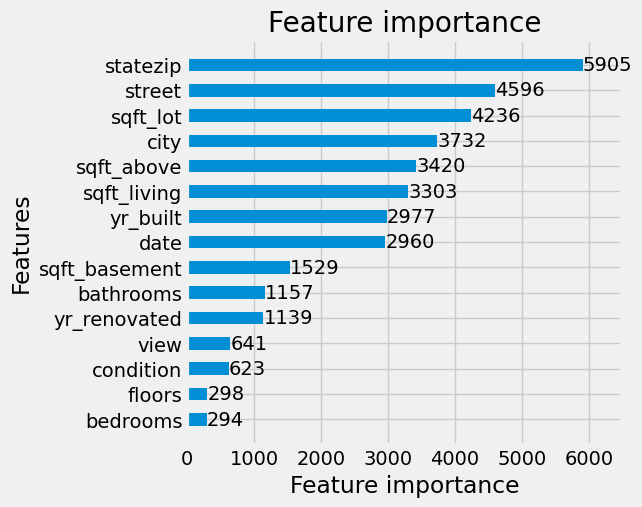

In [121]:
fig =  plt.figure(figsize = (5,5))
axes = fig.add_subplot(111)
lgb.plot_importance(modelL,ax = axes,height = 0.5)
plt.show();
plt.close()


9 Models comparison

In [122]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'XGB', 'LGBM'],
    
    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'd_train': acc_train_d,
    'd_test': acc_test_d,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
                     })

In [123]:
pd.options.display.float_format = '{:,.2f}'.format

In [124]:
print('Prediction accuracy for models by R2 criterion - r2_test')
models.sort_values(by=['r2_test', 'r2_train'], ascending=False)

Prediction accuracy for models by R2 criterion - r2_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
2,LGBM,92.15,74.42,7.45,14.14,"5,389,388.77","9,460,768.76"
1,XGB,92.75,73.09,8.11,14.53,"5,177,742.51","9,702,762.08"
0,Random Forest,95.33,67.84,6.32,16.22,"4,156,505.46","10,607,456.11"


In [125]:
print('Prediction accuracy for models by relative error - d_test')
models.sort_values(by=['d_test', 'd_train'], ascending=True)

Prediction accuracy for models by relative error - d_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
2,LGBM,92.15,74.42,7.45,14.14,"5,389,388.77","9,460,768.76"
1,XGB,92.75,73.09,8.11,14.53,"5,177,742.51","9,702,762.08"
0,Random Forest,95.33,67.84,6.32,16.22,"4,156,505.46","10,607,456.11"


In [126]:
print('Prediction accuracy for models by RMSE - rmse_test')
models.sort_values(by=['rmse_test', 'rmse_train'], ascending=True)

Prediction accuracy for models by RMSE - rmse_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
2,LGBM,92.15,74.42,7.45,14.14,"5,389,388.77","9,460,768.76"
1,XGB,92.75,73.09,8.11,14.53,"5,177,742.51","9,702,762.08"
0,Random Forest,95.33,67.84,6.32,16.22,"4,156,505.46","10,607,456.11"


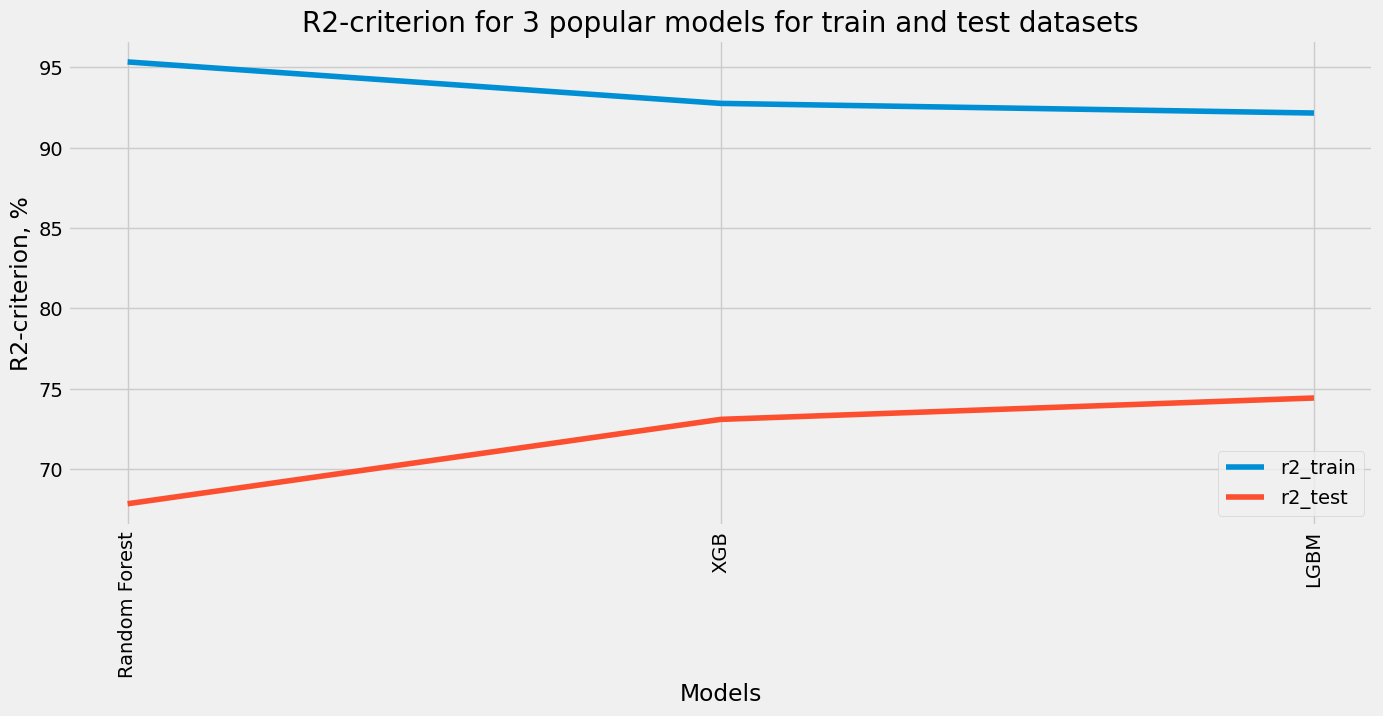

In [127]:
# Plot
plt.figure(figsize=[15,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['r2_train'], label = 'r2_train')
plt.plot(xx, models['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-criterion for 3 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()


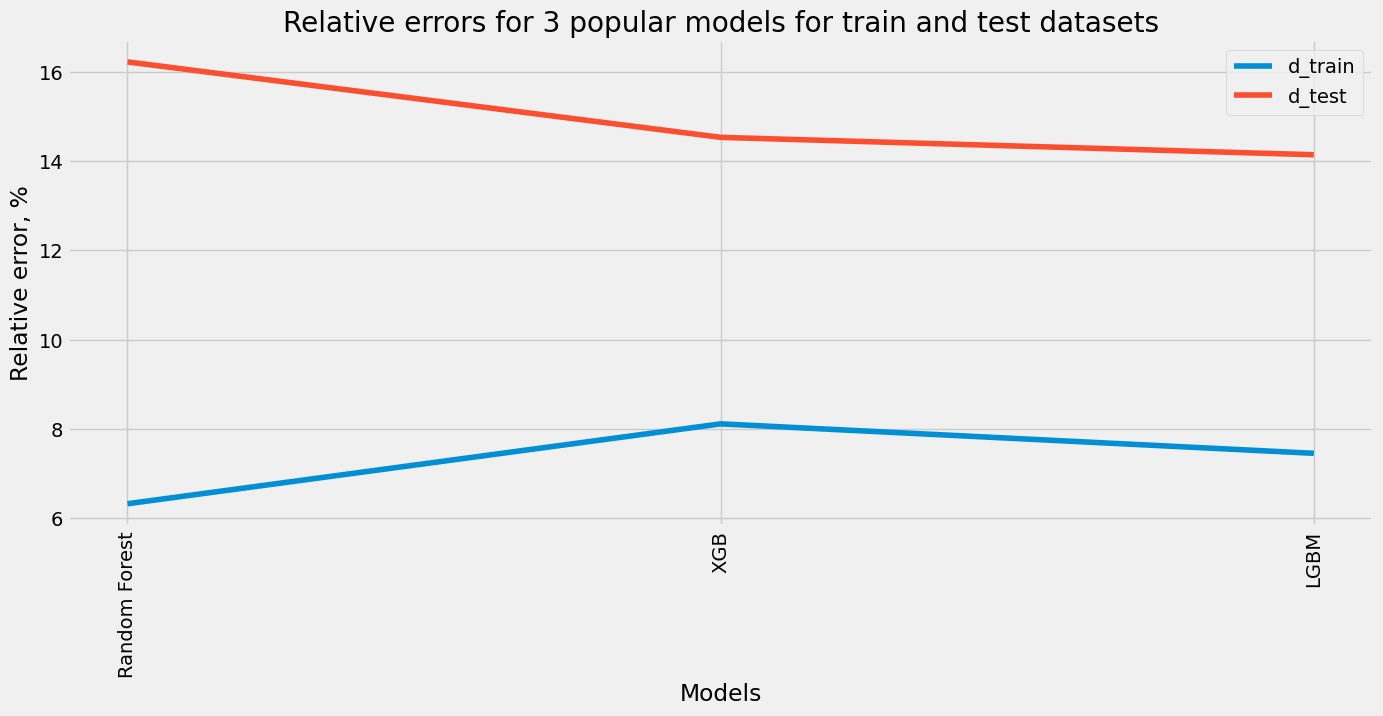

In [128]:
# Plot
plt.figure(figsize=[15,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['d_train'], label = 'd_train')
plt.plot(xx, models['d_test'], label = 'd_test')
plt.legend()
plt.title('Relative errors for 3 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Relative error, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

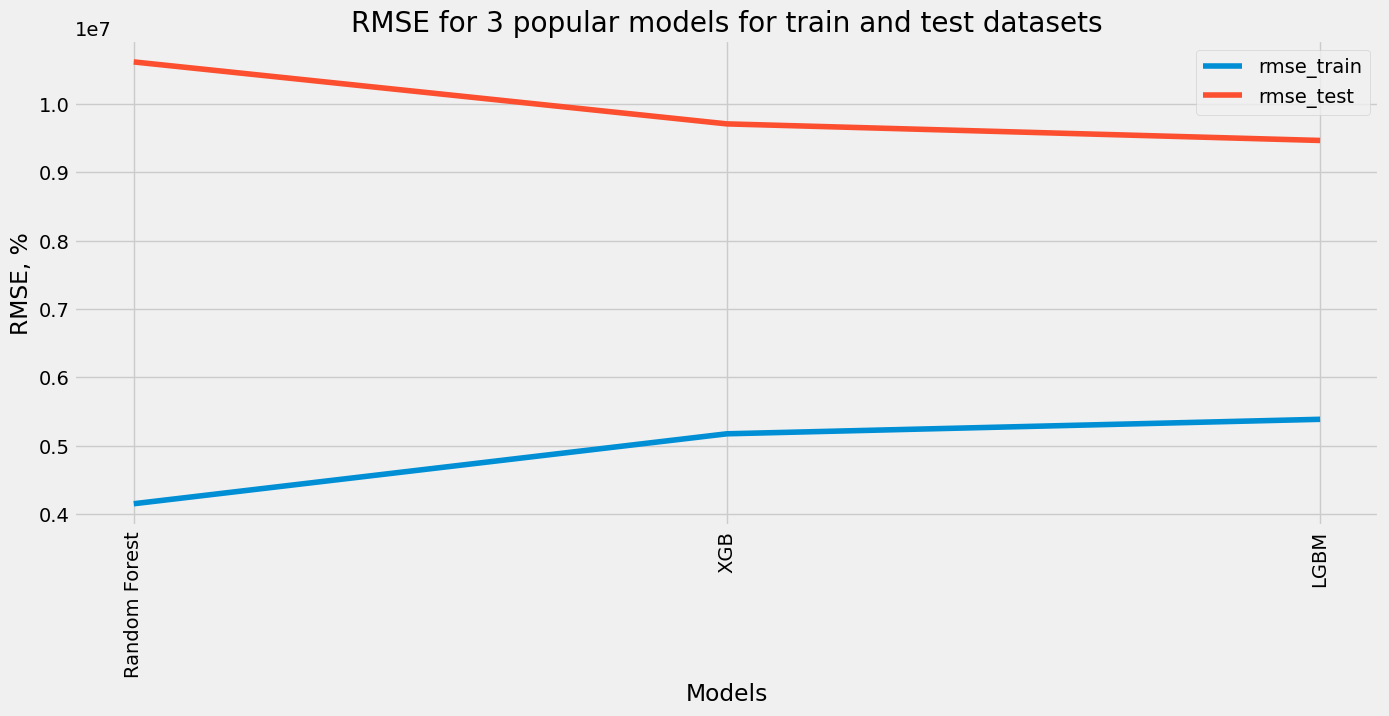

In [129]:
# Plot
plt.figure(figsize=[15,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['rmse_train'], label = 'rmse_train')
plt.plot(xx, models['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE for 3 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()


10 Prediction

In [130]:
test0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 2639 to 3278
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           744 non-null    int32  
 1   bedrooms       744 non-null    int32  
 2   bathrooms      744 non-null    float64
 3   sqft_living    744 non-null    int64  
 4   sqft_lot       744 non-null    int64  
 5   floors         744 non-null    int32  
 6   waterfront     744 non-null    int64  
 7   view           744 non-null    int64  
 8   condition      744 non-null    int64  
 9   sqft_above     744 non-null    int64  
 10  sqft_basement  744 non-null    int64  
 11  yr_built       744 non-null    int64  
 12  yr_renovated   744 non-null    int64  
 13  street         744 non-null    int32  
 14  city           744 non-null    int32  
 15  statezip       744 non-null    int32  
 16  country        744 non-null    int32  
dtypes: float64(1), int32(7), int64(9)
memory usage: 84

In [131]:
test0.head(3)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2639,46,3,1.75,2240,78225,2,0,0,5,2240,0,1976,0,1085,41,40,0
1824,32,2,2.50,2680,11214,1,0,0,3,2680,0,2006,0,2064,31,32,0
2169,38,3,1.75,2210,16200,1,0,0,3,1390,820,1958,2004,1691,3,4,0


In [132]:
#For models from Sklearn
testn = pd.DataFrame(scaler.transform(test0), columns = test0.columns)

In [133]:
# LGB Regression model for basic train
lgb_predict = modelL.predict(test0)
lgb_predict[:3]

array([543508.42878803, 739328.87977525, 592553.80671255])

In [134]:
final_df = test_target0.values
final_df = pd.DataFrame(final_df,columns=['Real_price'])
final_df['predicted_prices'] = lgb_predict.astype(int)
final_df['difference'] = abs(final_df['Real_price'] - final_df['predicted_prices']).astype(int)
final_df.head(20)

,Real_price,predicted_prices,difference
0,550000,543508,6492
1,930000,739328,190672
2,625000,592553,32447
3,399950,433039,33089
4,530000,648783,118783
5,723000,640530,82470
6,250000,326610,76610
7,657500,758567,101067
8,320000,334479,14479
9,594950,658789,63839
